In [40]:
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

### A1. Investigating the Population Data 

In [42]:
## A1-1. Create a data frame with these columns and rename the columns for each state

In [41]:
pd.set_option('mode.chained_assignment', None)

PopulationData = pd.read_csv('EstimatedResidentPopulationByStateAndGender.csv')
interestReport = PopulationData[['Unnamed: 0','Estimated Resident Population ;  Persons ;  New South Wales ;',
                                 'Estimated Resident Population ;  Persons ;  Victoria ;','Estimated Resident Population ;  Persons ;  Queensland ;','Estimated Resident Population ;  Persons ;  South Australia ;','Estimated Resident Population ;  Persons ;  Western Australia ;',
                                 'Estimated Resident Population ;  Persons ;  Tasmania ;','Estimated Resident Population ;  Persons ;  Northern Territory ;','Estimated Resident Population ;  Persons ;  Australian Capital Territory ;']]
interestReport.rename(columns = {'Unnamed: 0':'Time'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  New South Wales ;':'NSW'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Victoria ;':'VIC'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Queensland ;':'QLD'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  South Australia ;':'SA'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Tasmania ;':'TAS'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Northern Territory ;':'NT'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;':'ACT'}, inplace = True)
interestReport.rename(columns = {'Estimated Resident Population ;  Persons ;  Western Australia ;':'WA'}, inplace = True)
df1 = interestReport.loc[:, ['VIC','NSW','QLD']]
df1.head()

,VIC,NSW,QLD
0,5023203,6718023,3964175
1,5048207,6735528,3987653
2,5061266,6742690,4007992
3,5083593,6766133,4031580
4,5103965,6786160,4055845


#### I create the data frame with columns renamed VIC, NSW and QLD.

In [43]:
## A1-2. In Python (or R) plot the population of Victoria, New South Wales and Queensland over time. You don't need to put 
## the dates on the x-axis, just showing the index of each quarter is fine.

-----------------------------------A1-2------------------------------------


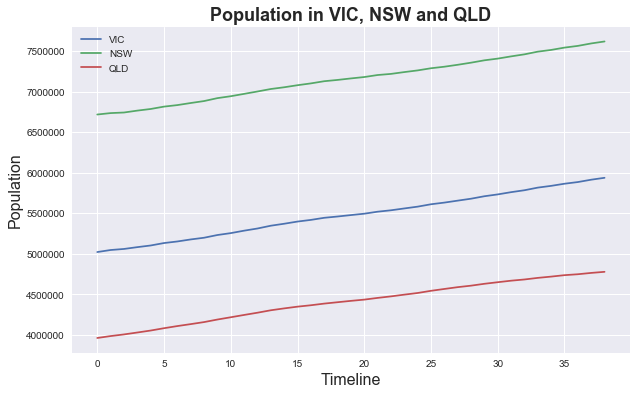

In [44]:
print '-----------------------------------A1-2------------------------------------'
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(df1)
plt.grid(True)
plt.ylabel ('Population', fontsize = 16)
plt.xlabel ('Timeline', fontsize = 16)
plt.legend( [name for name in df1.columns], loc = 'upper left',fontsize = 10)
plt.title('Population in VIC, NSW and QLD',fontsize = 18, fontweight = 'bold')
plt.show()

#### a. Obviously, the line chart shows the population of Vitoria, New South Wales and Queensland are incresing overtime. 

#### b. Based the continously increase of the population for these three states in the past several years, it probably exhibits a increasing trend in the future.

In [45]:
### A1-3. Fit a linear regression to the Victorian population data and plot the linear fit.  

-------------------------------------A1-3---------------------------------------


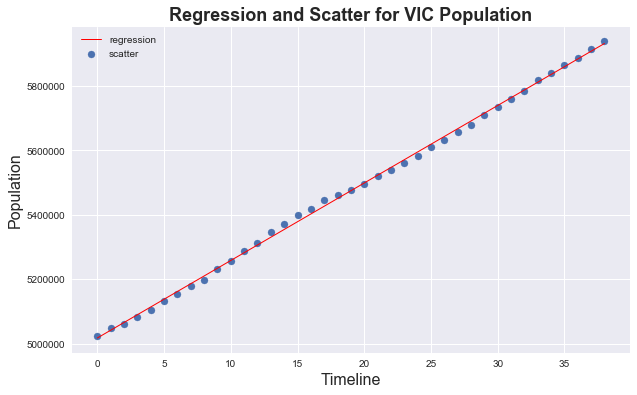

In [46]:
from scipy.stats import linregress
print '-------------------------------------A1-3---------------------------------------'

df2 = interestReport.loc[:,['VIC']]   
df2 = df2.reset_index()
x = df2.index
y = df2.VIC
plt.scatter(df2['index'],df2['VIC'])

slope, intercept, r_value, p_value, std_err = linregress(df2['index'],df2['VIC'])
line = [slope*xi + intercept for xi in df2['index']]
plt.plot(df2['index'],line,'r-', linewidth=1)
plt.ylabel ('Population', fontsize = 16)
plt.xlabel ('Timeline', fontsize = 16)
plt.legend( ['regression','scatter'], loc = 'upper left')
plt.title('Regression and Scatter for VIC Population',fontsize = 18, fontweight = 'bold')
plt.show() 

In [47]:
### a. This regression model predict the resident population in Victoria will be for the following dates: 1/9/15, 1/12/15, 
### 1/12/16 and 1/12/17? 

In [48]:
import statsmodels.api as sm

pd.set_option('mode.chained_assignment', None)
X = x.values.reshape(39, 1)

model = LinearRegression()
model.fit(X,y)

X_predict = [41,42,46,50]
y_predict = model.predict(np.reshape(X_predict, (-1, 1)))
print(y_predict)

[ 6003997.25060729  6028040.95080972  6124215.75161943  6220390.55242915]


### Answer:
#### I have known the slope and the y-intercept of that regression line, then I can plug in a value for X and predict the average value for Y. In other words, you predict (the average) Y from X.
#### I can infer the values of xi which is corresponsive to "Time" are [41,42,46,50], based on the order between index and time.


#### The predction of 1/9/15, 1/12/15, 1/12/16 and 1/12/17 are [ 6003997.25060729  6028040.95080972  6124215.75161943  6220390.55242915]


## A2. Investigating Enrolment Data

In [49]:
#### A2-1. Create a data frame with each of the university enrolments and dates. 

In [67]:
print ('--------------------A2-1----------------------------')
ReadReport2 = pd.read_csv('StudentEnrolment.csv')

df3 = ReadReport2
df3.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
df3.head()

--------------------A2-1----------------------------


,Date,UNSW,USYD,ANU,Uni Melb,Monash,AU,UQ,UWA
0,1/12/05,39183,45630,14317,41827,54950,18943,37177,17082
1,1/3/06,38776,45848,14553,43389,54824,19290,37518,17761
2,1/6/06,38776,45848,14553,43389,54824,19290,37518,17761
3,1/9/06,38776,45848,14553,43389,54824,19290,37518,17761
4,1/12/06,38776,45848,14553,43389,54824,19290,37518,17761


In [68]:
## A2-2. In Python (or R) plot the enrolments of eight universities over time. You don't need to put the dates on the x-axis, 
##      just showing the index of each quarter is fine. 

---------------------------------A2-2-------------------------------------


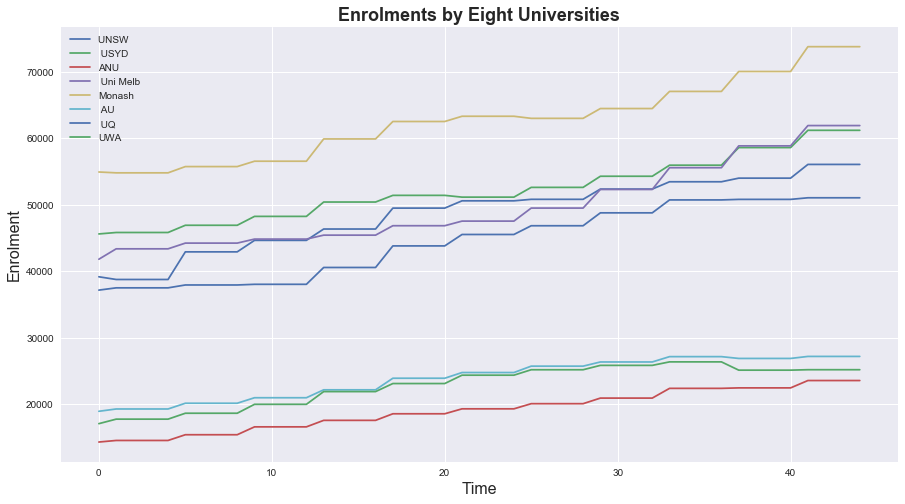

In [69]:
print '---------------------------------A2-2-------------------------------------'
import matplotlib.pyplot as plt 

plt.plot(df3.iloc[:, 1:9] )

plt.grid(True)
plt.ylabel ('Enrolment', fontsize = 16)
plt.xlabel ('Time', fontsize = 16)
plt.legend( [name for name in df3.iloc[:, 1:9].columns], loc = 'upper left')
plt.title('Enrolments by Eight Universities',fontsize = 18, fontweight = 'bold')
plt.show()

#### a. Obviously, the figure demonstrates Monash, Usyd, Uni Melb, Unsw and UQ are increasing over time, while AU, UWA and ANU are accepting the gradually decreasing enrolment of students over time even if the values had an increasing in the past time.

#### b. Monash Uni has the highest enrolments, which is located on Victoria state.

#### c. Regarding to the fact that the population of VIC, NSW and QLD increases a lot during these years, this phenomenon is likely to stimulate the development of the enrolments of students.

In [70]:
### A2-3. Fit a linear regression to the Victorian students enrolment data and plot the linear fit. 

--------------------------------A2-3-----------------------------------


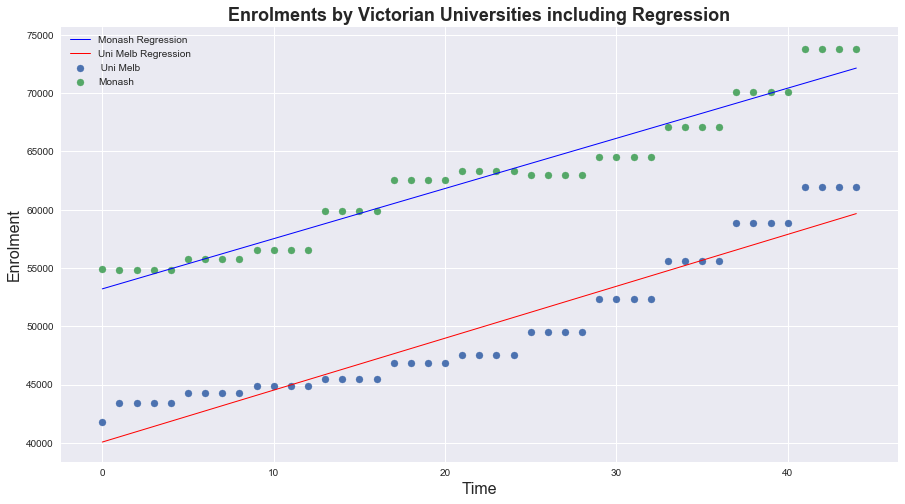

Monash standard error: 15.493782841
Uni Melb standard error: 21.7003532233


In [71]:
print ('--------------------------------A2-3-----------------------------------')
from scipy.stats import linregress
from matplotlib import pyplot as plt
df3 = df3.iloc[:,4:6]
df3.head()

plt.scatter(df3.index,df3[' Uni Melb '])
plt.scatter(df3.index,df3['Monash'])
plt.ylabel ('Enrolment',fontsize = 16)
plt.xlabel ('Time',fontsize = 16)
plt.rcParams["figure.figsize"] = (15,8)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df3.index,df3['Monash'])
line1 = [slope1*xi + intercept1 for xi in df3.index]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df3.index,df3[' Uni Melb '])
line2 = [slope2*xi + intercept2 for xi in df3.index]
plt.plot(df3.index,line1,'r-', linewidth=1, label = 'Monash Regression', color="blue")
plt.plot(df3.index,line2,'r-', linewidth=1, label = 'Uni Melb Regression')
plt.title('Enrolments by Victorian Universities including Regression',fontsize = 18, fontweight = 'bold')
plt.legend( )
plt.show()

In [89]:
## A2-3-a  Do these linear look good? Why does one linear fit looks better?

In [90]:
print 'Monash standard error:' , std_err1
print 'Uni Melb standard error:' , std_err2 

Monash standard error: 12.2379844465
Uni Melb standard error: 24.8187064296


#### a. Both of them looks good, while the linear of Monash looks better.


#### In mathmathic :    
"std_err" is an estimate of the standard deviation of the underlying    errors in the prediction, and it is regarded as the mathmathic          meaning of the "Coefficient of Variation" which is the most commonly    used goodness-of-fit measure. Therefore, the less the "std_err" is, the better fitting of the linear is. 15.493782841 < 21.7003532233, so Monash linear fits better.
#### In graphics:
The less distance the "Scatter Dot" of the "Regression Linear" is, the better fitting is.  

In [102]:
## A2-3-b. What does the model predict Uni Melb and Monash’s enrolments will be for 
## the following dates: 1/12/15, 1/12/16 and 1/12/17.

In [103]:
print 'b: 1/12/15, 1/12/16 and 1/12/17'
print '   Based on the regression model, I can predict:'
import statsmodels.api as sm
X = df3.index.values.reshape(45, 1)

model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(X,df3['Monash'])
model2.fit(X,df3[' Uni Melb '])

X_predict = [42,46,50]

y_predict1 = model1.predict(np.reshape(X_predict, (-1, 1)))
y_predict2 = model2.predict(np.reshape(X_predict, (-1, 1)))
print '   For Monash:', y_predict1
print '   For Uni Melb:', y_predict2

b: 1/12/15, 1/12/16 and 1/12/17
   Based on the regression model, I can predict:
   For Monash: [ 71290.33131313  73011.71313131  74733.09494949]
   For Uni Melb: [ 58779.43636364  60560.43030303  62341.42424242]


### A3. Investigating the Job Vacancies Data 

In [104]:
#### A3-1. Create a data frame and include the dates. 

In [105]:
from pylab import *
print ('--------------------------------A3-1-----------------------------------')
ReadReport3 = pd.read_csv('JobVacancies.csv')

RR3 = ReadReport3
RR3 = RR3.set_index(['State'])
RR3.index.names = ['Date']
RR3 = RR3.transpose()
RR3X = RR3
RR3 = RR3.reset_index()
RR3 = RR3.loc[:, ['VIC','NSW','QLD','SA','WA','TAS','NT','ACT']]
RR3X.head()

--------------------------------A3-1-----------------------------------


Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
2006-01-01,73047.8,49399.3,49807.5,13111.4,18087.6,2895.0,2563.0,3165.3
2006-02-01,73995.0,51027.9,49526.3,13160.9,18943.3,2874.7,2402.0,3335.5
2006-03-01,75246.3,51492.4,49233.0,13669.6,19739.3,3272.3,2485.0,3473.9
2006-04-01,76539.8,51473.1,50440.4,13308.7,19854.2,2833.2,2590.6,3493.0
2006-05-01,75614.9,50570.0,51387.3,13095.8,20351.9,2747.1,2805.4,3666.7


#### As shown above, in order to plot clearlier, I reshape the columns and rows.


#### Now the columns are states, and rows are "Date".

In [106]:
## A3-2. Plot the job vacancies’ of each state over time. You don't need to put the dates on the x-axis, 
##       just showing the index of each day is fine. 

-----------------------------------------------------A3-2-------------------------------------------------------


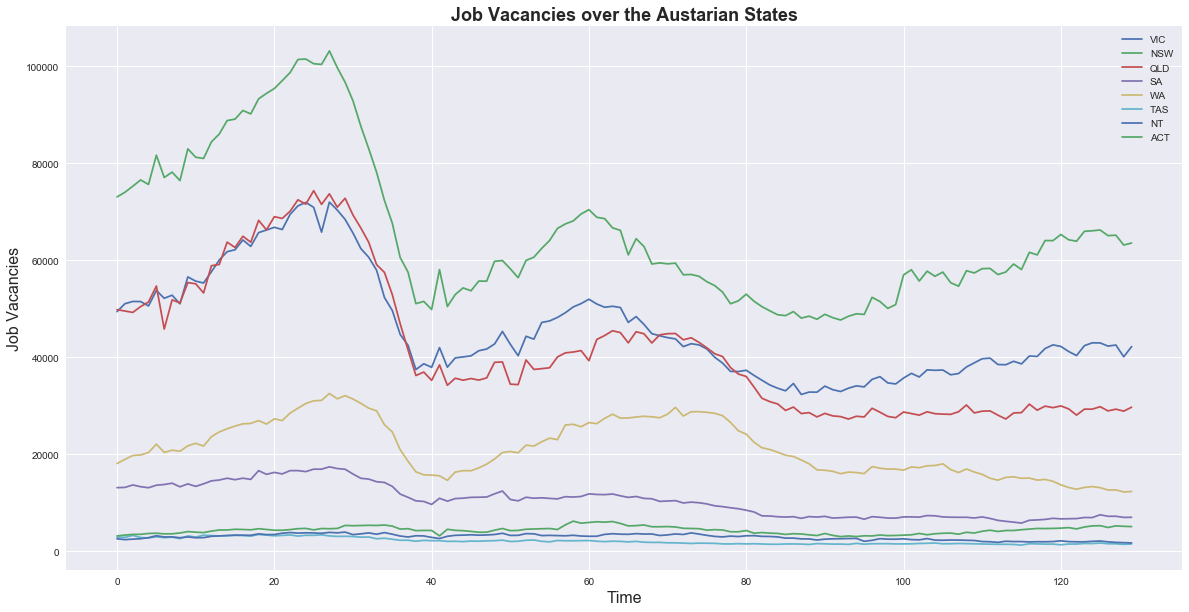

In [107]:
print ('-----------------------------------------------------A3-2-------------------------------------------------------')

from matplotlib import pyplot as plt
plt.plot(RR3)
plt.legend( [name for name in RR3.columns], loc = 'upper right')
plt.ylabel ('Job Vacancies',fontsize = 16)
plt.xlabel ('Time',fontsize = 16)
plt.title('Job Vacancies over the Austarian States',fontsize = 18, fontweight = 'bold')
plt.show()

In [108]:
print 'The maximum for job vacancies in Victoria is :' , RR3['VIC'].max() 
print 'The minimum for job vacancies in Victoria is :' , RR3['VIC'].min() 

The maximum for job vacancies in Victoria is : 71971.4
The minimum for job vacancies in Victoria is : 32322.2


In [109]:
#### A3-3. Fit a linear regression to the data and plot it. 

--------------------------------A3-3-----------------------------------


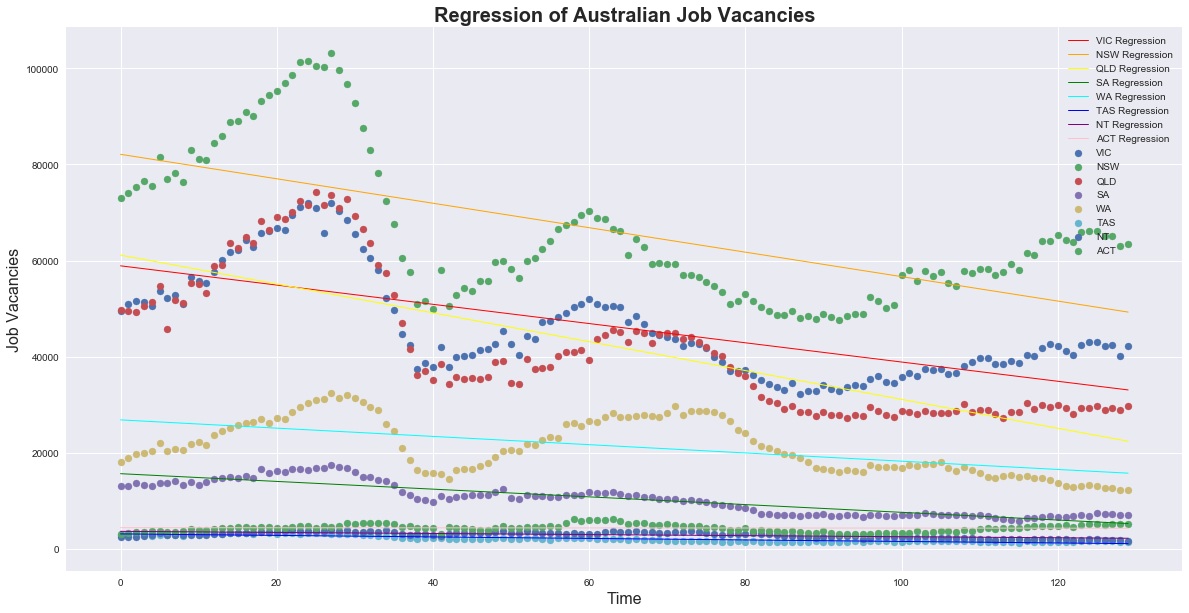

In [110]:
print ('--------------------------------A3-3-----------------------------------')

from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

ReadReport3 = pd.read_csv('JobVacancies.csv')
RR3 = ReadReport3
RR3 = RR3.set_index(['State'])
RR3.index.names = ['Index']
RR3 = RR3.transpose()
RR3 = RR3.reset_index()
RR3 = RR3.loc[:, ['VIC','NSW','QLD','SA','WA','TAS','NT','ACT']]

plt.scatter(RR3.index,RR3['VIC'])
plt.scatter(RR3.index,RR3['NSW'])
plt.scatter(RR3.index,RR3['QLD'])
plt.scatter(RR3.index,RR3['SA'])
plt.scatter(RR3.index,RR3['WA'])
plt.scatter(RR3.index,RR3['TAS'])
plt.scatter(RR3.index,RR3['NT'])
plt.scatter(RR3.index,RR3['ACT'])
plt.ylabel ('Job Vacancies',fontsize = 16)
plt.xlabel ('Time',fontsize = 16)

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(RR3.index,RR3['VIC'])
line1 = [slope1*xi + intercept1 for xi in RR3.index]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(RR3.index,RR3['NSW'])
line2 = [slope2*xi + intercept2 for xi in RR3.index]
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(RR3.index,RR3['QLD'])
line3 = [slope3*xi + intercept3 for xi in RR3.index]
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(RR3.index,RR3['SA'])
line4 = [slope4*xi + intercept4 for xi in RR3.index]
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(RR3.index,RR3['WA'])
line5 = [slope5*xi + intercept5 for xi in RR3.index]
slope6, intercept6, r_value6, p_value6, std_err6 = linregress(RR3.index,RR3['TAS'])
line6 = [slope6*xi + intercept6 for xi in RR3.index]
slope7, intercept7, r_value7, p_value7, std_err7 = linregress(RR3.index,RR3['NT'])
line7 = [slope7*xi + intercept7 for xi in RR3.index]
slope8, intercept8, r_value8, p_value8, std_err8 = linregress(RR3.index,RR3['ACT'])
line8 = [slope8*xi + intercept8 for xi in RR3.index]
plt.plot(RR3.index,line1,'r-', linewidth=1, label = 'VIC Regression', color="red")
plt.plot(RR3.index,line2,'r-', linewidth=1, label = 'NSW Regression',color="orange")
plt.plot(RR3.index,line3,'r-', linewidth=1, label = 'QLD Regression',color="yellow")
plt.plot(RR3.index,line4,'r-', linewidth=1, label = 'SA Regression',color="green")
plt.plot(RR3.index,line5,'r-', linewidth=1, label = 'WA Regression',color="cyan")
plt.plot(RR3.index,line6,'r-', linewidth=1, label = 'TAS Regression',color="blue")
plt.plot(RR3.index,line7,'r-', linewidth=1, label = 'NT Regression',color="purple")
plt.plot(RR3.index,line8,'r-', linewidth=1, label = 'ACT Regression',color="pink")
plt.title('Regression of Australian Job Vacancies',fontsize =20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend( )
plt.show()

In [111]:
print 'VIC std_err:',std_err1
print 'NSW std_err:',std_err2
print 'QLD std_err:',std_err3
print 'SA std_err:',std_err4
print 'WA std_err:',std_err5
print 'TAS std_err:',std_err6
print 'NT std_err:',std_err7
print 'ACT std_err:',std_err8

VIC std_err: 17.5455322588
NSW std_err: 27.3489392133
QLD std_err: 19.3944664543
SA std_err: 3.35837133797
WA std_err: 10.7879699899
TAS std_err: 0.676539993872
NT std_err: 1.01593527949
ACT std_err: 1.74589033589


 In graph, VIC, NSW,QLD,WA , these 4 do not have a good fit, beacause most scatters are not located on the regression linear. SA, ACT, NT, TAS, these have more fitting.
  In order to give more scientific evidence, I calculate the "std_err" that is the index of a measure of the accuracy of predictions, so it can tell me whether I should believe the predicitions. 

Obviously, the calculation result shown is as same as the graph ! The std_err of VIC, NSW,QLD,WA are more than 10%, and those of SA, ACT, NT, TAS is less than 5%. "Estimates with a RSE of 25% or greater are subject to high sampling error and should be used with caution." (from Australian Bureau of Statictics, http://www.abs.gov.au/websitedbs/d3310114.nsf/Home) Therefore, all these 8 regression linears are relatively reliable, and SA, ACT, NT, TAS are the most reliable preduictions.

In [134]:
## A3-4. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points 
##       (say from the 90th data point onwards.) 

--------------------------------A3-4-----------------------------------

Total data points (rows) are: 130
Therefore, the 90th data point onwards should be: index [ 89 : 129 ]


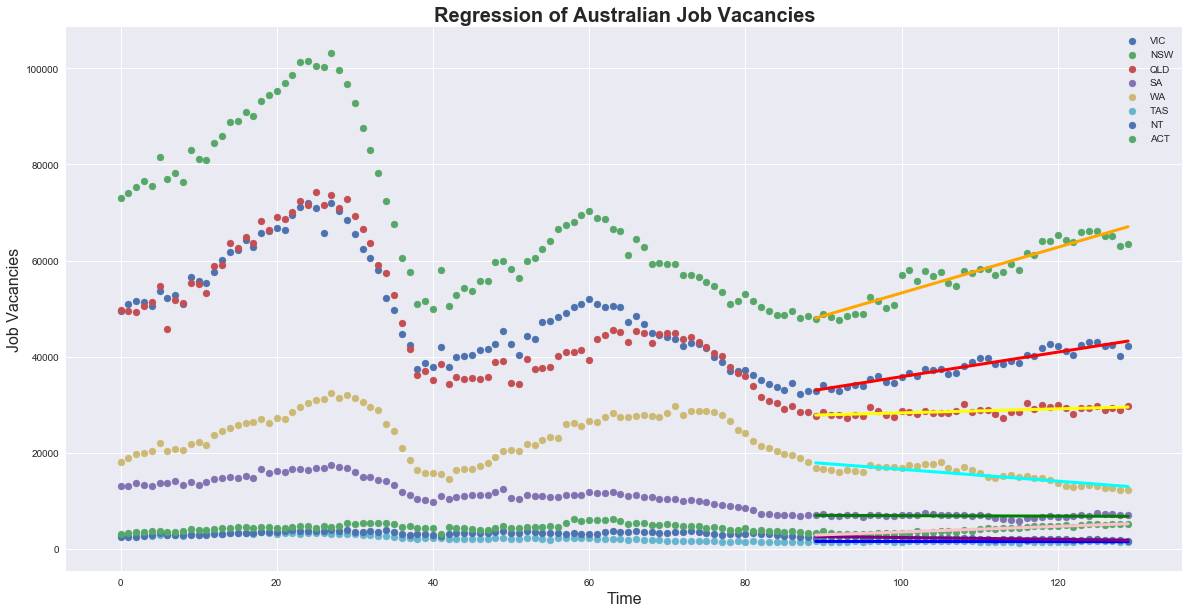

In [115]:
import numpy as np
print ('--------------------------------A3-4-----------------------------------')
print ''
total_rows=len(RR3.axes[0]) 
print 'Total data points (rows) are:',total_rows
print 'Therefore, the 90th data point onwards should be: index [ 89 :',len(RR3.axes[0])-1,']'

plt.scatter(RR3.index,RR3['VIC'])
plt.scatter(RR3.index,RR3['NSW'])
plt.scatter(RR3.index,RR3['QLD'])
plt.scatter(RR3.index,RR3['SA'])
plt.scatter(RR3.index,RR3['WA'])
plt.scatter(RR3.index,RR3['TAS'])
plt.scatter(RR3.index,RR3['NT'])
plt.scatter(RR3.index,RR3['ACT'])
plt.ylabel ('Job Vacancies',fontsize = 16)
plt.xlabel ('Time',fontsize = 16)

recent_data = RR3.loc[89: 129]
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(recent_data.index,recent_data['VIC'])
line1 = [slope1*xi + intercept1 for xi in recent_data.index]
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(recent_data.index,recent_data['NSW'])
line2 = [slope2*xi + intercept2 for xi in recent_data.index]
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(recent_data.index,recent_data['QLD'])
line3 = [slope3*xi + intercept3 for xi in recent_data.index]
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(recent_data.index,recent_data['SA'])
line4 = [slope4*xi + intercept4 for xi in recent_data.index]
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(recent_data.index,recent_data['WA'])
line5 = [slope5*xi + intercept5 for xi in recent_data.index]
slope6, intercept6, r_value6, p_value6, std_err6 = linregress(recent_data.index,recent_data['TAS'])
line6 = [slope6*xi + intercept6 for xi in recent_data.index]
slope7, intercept7, r_value7, p_value7, std_err7 = linregress(recent_data.index,recent_data['NT'])
line7 = [slope7*xi + intercept7 for xi in recent_data.index]
slope8, intercept8, r_value8, p_value8, std_err8 = linregress(recent_data.index,recent_data['ACT'])
line8 = [slope8*xi + intercept8 for xi in recent_data.index]
plt.plot(recent_data.index,line1,'r-', linewidth=3, color="red")
plt.plot(recent_data.index,line2,'r-', linewidth=3, color="orange")
plt.plot(recent_data.index,line3,'r-', linewidth=3, color="yellow")
plt.plot(recent_data.index,line4,'r-', linewidth=3, color="green")
plt.plot(recent_data.index,line5,'r-', linewidth=3, color="cyan")
plt.plot(recent_data.index,line6,'r-', linewidth=3, color="blue")
plt.plot(recent_data.index,line7,'r-', linewidth=3, color="purple")
plt.plot(recent_data.index,line8,'r-', linewidth=3, color="pink")
plt.title('Regression of Australian Job Vacancies',fontsize =20, fontweight = 'bold')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend( )
plt.show()

In [116]:
print 'VIC std_err:',std_err1
print 'NSW std_err:',std_err2
print 'QLD std_err:',std_err3
print 'SA std_err:',std_err4
print 'WA std_err:',std_err5
print 'TAS std_err:',std_err6
print 'NT std_err:',std_err7
print 'ACT std_err:',std_err8

VIC std_err: 12.2379844465
NSW std_err: 24.8187064296
QLD std_err: 8.42322146252
SA std_err: 4.62879028833
WA std_err: 11.784314523
TAS std_err: 1.14921782638
NT std_err: 1.94080222494
ACT std_err: 2.80204464598


 I only fit the data from 90th data point, and unfortunely, half of the slopes are contrary to the slopes used by all the data. And it fits better than the regression linear which is plotted by all the data, because most "Scatter Dots" are not far from the "Regression Linear".
 For more accurate proof, I calculate the "std_err" that is the standard deviation of a sampling distribution. The less the std_err is, the more reliable of the prediction is. Therefore, TAS of prediction is the most reliable in the future.

### A4. Investigating the Unemployment Data

#### A4-1. Create a data frame, including the dates. 

In [121]:
print ('--------------------------------A4-1-----------------------------------')
from pylab import *
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np

XL = pd.ExcelFile('EmploymentTimeSeries.xls')
dfx = XL.parse('Time Series')
RR4 = dfx.loc[:, ['State/Territory','Date','Unemployment Rate (15+)']]
rr4 = pd.pivot_table(RR4,index=["Date"],columns=["State/Territory"])
rr4.columns = rr4.columns.droplevel(0)  
rr4.head()

--------------------------------A4-1-----------------------------------


State/Territory,ACT,NSW,NT,QLD,SA,TAS,VIC,WA
Date,,,,,,,,
1978-02-01,5.716305,6.773762,7.657833,7.266082,7.076868,6.621015,5.956411,6.575607
1978-03-01,5.770590,6.490161,7.037714,7.279538,6.448651,6.197741,5.746178,5.971626
1978-04-01,5.805420,6.507978,6.378075,6.856476,6.499987,6.309658,5.575723,6.274599
1978-05-01,5.897355,6.115171,5.773537,7.161268,6.709422,6.220199,5.697610,6.328462
1978-06-01,6.052601,6.424127,5.273143,7.108727,6.833335,6.597852,5.517504,6.267387


#### I convert from "Date" to the index and from "State/Territory" to columns, and remove all the duplicated "Date" and "State/Territory".

In [122]:
## A4-2. Plot the unemployment data of each state over time. 

-------------------------------------------A4-2-------------------------------------------------


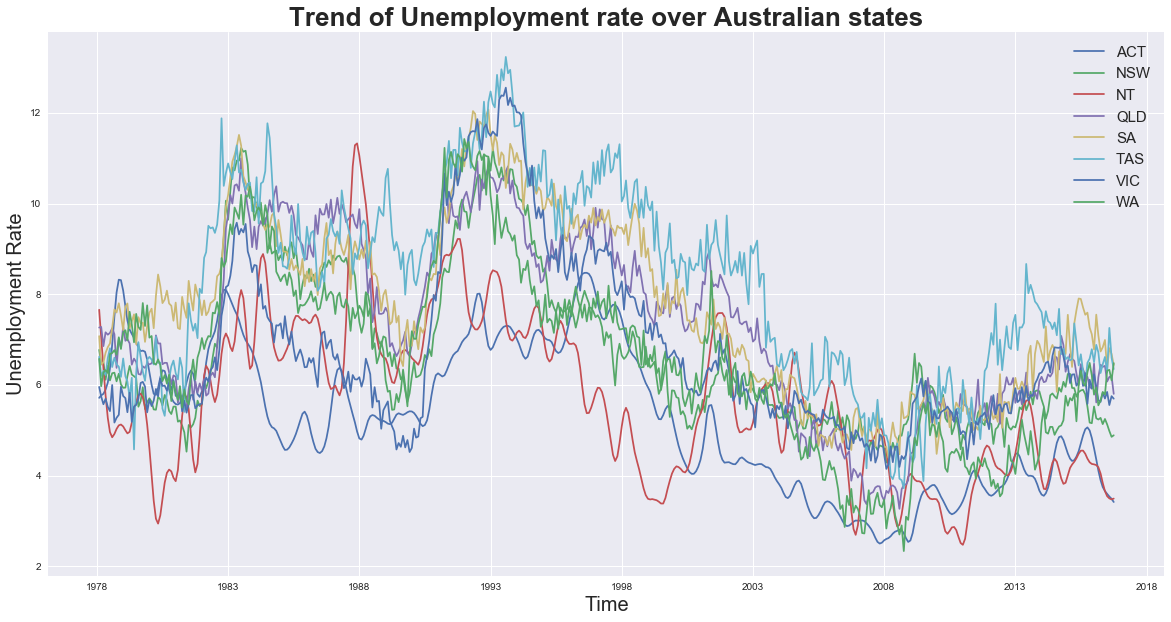

In [123]:
print ('-------------------------------------------A4-2-------------------------------------------------')

plt.ylabel ('Unemployment Rate',fontsize = 20)
plt.xlabel ('Time',fontsize = 20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Trend of Unemployment rate over Australian states',fontsize =26, fontweight = 'bold')
plt.legend( )
plt.grid(True)
plt.plot(rr4)
plt.legend( [name for name in rr4.columns], loc = 'upper right',fontsize =15)
plt.show()

In [126]:
### A4-3. It looks like the rate has been very high at times in the past..

In [127]:
filt = (rr4.VIC == rr4['VIC'].max())
rr4 = rr4[filt]
rr4 = rr4.loc[:,['VIC']]
rr4

State/Territory,VIC
Date,
1993-08-01,12.553338


a. The maxmum unemployment rate is 12.553338

b. It occurred on 1993-08-01

### A5. Investigating the Graduate Employment Data 

In [128]:
## A5-1. Create a data frame. Include the dates. 

In [129]:
import pandas as pd
readfile = pd.ExcelFile('GraduateEmploymentTimeSeries.xls')
RR5 = readfile.parse('Time Series')
RR5.head()

,University,Date,Graduate Employment Rate (< 3 months post-graduation),Graduate Unemployment Rate (< 6 months)
0,UNSW,1978-02-01,62.1,14.563587
1,UNSW,1978-03-01,63.4,13.953846
2,UNSW,1978-04-01,63.7195,13.992152
3,UNSW,1978-05-01,63.682,13.147617
4,UNSW,1978-06-01,63.6829,13.811873


In [130]:
## A5-2. Plot the unemployment data of each university over time. 

------------------------------------A5-2---------------------------------------


University,Monash,UNSW,UQ
Date,,,
1978-02-01,19.417899,14.563587,19.400440
1978-03-01,18.732541,13.953846,19.436366
1978-04-01,18.176858,13.992152,18.306792
1978-05-01,18.574208,13.147617,19.120586
1978-06-01,17.987061,13.811873,18.980300


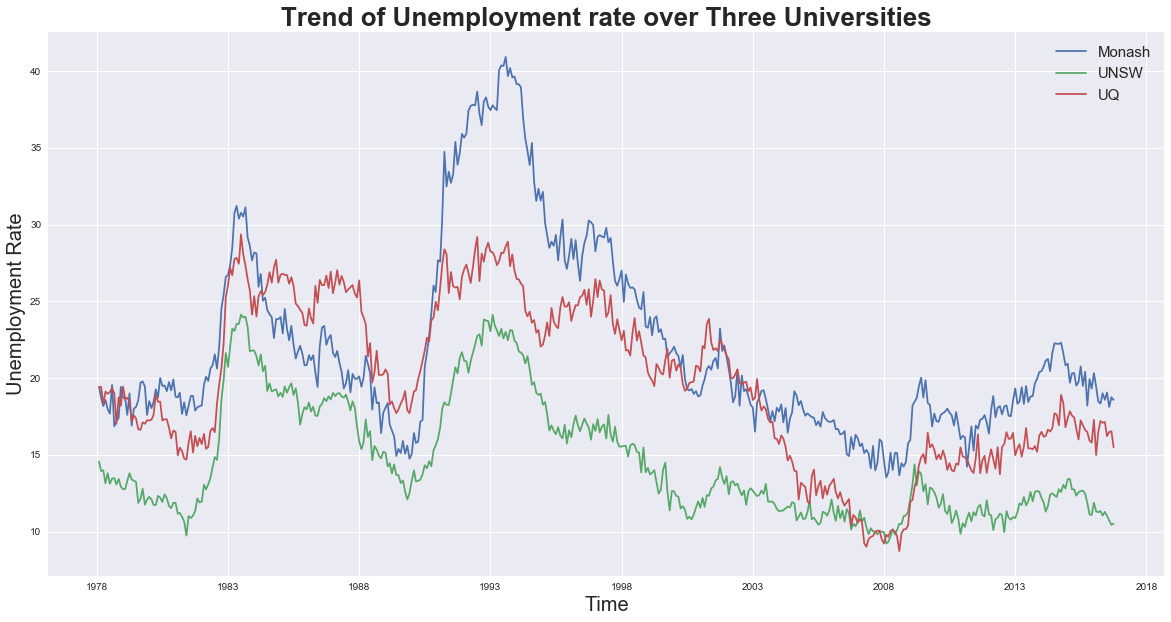

In [133]:
print '------------------------------------A5-2---------------------------------------'

RR5 = RR5.loc[:, ['University','Date','Graduate Unemployment Rate (< 6 months)']]
rr5 = pd.pivot_table(RR5,index=["Date"],columns=["University"])
rr5.columns = rr5.columns.droplevel(0)  
display(rr5.head())

plt.ylabel ('Unemployment Rate',fontsize = 20)
plt.xlabel ('Time',fontsize = 20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Trend of Unemployment rate over Three Universities',fontsize =26, fontweight = 'bold')
plt.legend( )
plt.grid(True)
plt.plot(rr5)
plt.legend( [name for name in rr5.columns], loc = 'upper right',fontsize =15)
plt.show()


#### Processing: 1). I convert from "Date" to the index and from "University" to columns. 2). Remove all the duplicated "Date" and "University".

 A5-2-a.  
Comparsion to "Unemployment Rate", Monash, UNSW and UQ University had the similar changes of unemployment during the same period, and even the trends had the peak of unployment in the same year(1993).

A5-2-b.  
I can conculde that Monash, UNSW and UQ University probably had the majority of students on the whole Australian universities,so the graduate unemployment of these three universities had a direct reflection on the Australian society.  
Around 1993, these universities had the peak unemployment graduate, which probably caused by the "Early 1990s recession in Australia" event-----The early 1990s recession saw a period of economic downturn affect much of the world in the late 1980s and early 1990s.(from wikipedia). It is known that the economoy the society always has the profound effects on the macroeconomic index, such as this jobless rate.

### A6. Visualising the Relationship between Unemployment and Job Vacancies 

In [135]:
## A6-1. Combine the data from the different files into a single table. The table should contain population values, 
##       job vacancy counts and unemployment rates for all of the different dates and different States/Territories.

In [137]:
## In order to get the requred merge table, I divide the processing in 4 steps:

# First, I merge unemployment rate and job vacancies.

In [174]:
print '------------------------------------A6-1---------------------------------------'

from IPython.display import display

interestReport.rename(columns = {'Time':'Date'}, inplace = True)

ReadReport3 = pd.read_csv('JobVacancies.csv')
R3 = ReadReport3
R3 = R3.set_index(['State'])
R3 = R3.transpose()
R3X = R3
R3X = R3X.reset_index()
R3X.rename(columns = {'index':'Date'}, inplace = True)
R3X['Date'] = pd.DatetimeIndex(R3X.Date).normalize()
     
XL = pd.ExcelFile('EmploymentTimeSeries.xls')
dfx = XL.parse('Time Series')
RR4 = dfx.loc[:, ['State/Territory','Date','Unemployment Rate (15+)']]
rr4 = pd.pivot_table(RR4,index=["Date"],columns=["State/Territory"])
rr4.columns = rr4.columns.droplevel(0)  
rr4 = rr4.reset_index()
rr4 = rr4.loc[:, ['Date','VIC','NSW','QLD','SA','WA','TAS','NT','ACT']]
rr4['Date'] = pd.DatetimeIndex(rr4.Date).normalize()

comb = pd.merge(rr4,R3X, how = 'outer', on = 'Date')
comb.Date = comb.Date.dt.strftime('%d/%m/%Y')

comb

------------------------------------A6-1---------------------------------------


,Date,VIC_x,NSW_x,QLD_x,SA_x,WA_x,TAS_x,NT_x,ACT_x,NSW_y,VIC_y,QLD_y,SA_y,WA_y,TAS_y,NT_y,ACT_y
0,01/02/1978,5.956411,6.773762,7.266082,7.076868,6.575607,6.621015,7.657833,5.716305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/1978,5.746178,6.490161,7.279538,6.448651,5.971626,6.197741,7.037714,5.770590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/04/1978,5.575723,6.507978,6.856476,6.499987,6.274599,6.309658,6.378075,5.805420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/05/1978,5.697610,6.115171,7.161268,6.709422,6.328462,6.220199,5.773537,5.897355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/06/1978,5.517504,6.424127,7.108727,6.833335,6.267387,6.597852,5.273143,6.052601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/07/1978,5.424096,6.100929,7.148239,6.914783,6.684368,6.810115,4.960663,6.364080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/08/1978,6.000070,6.258992,7.251327,7.254519,6.704765,6.395711,4.847575,6.887665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01/09/1978,5.172004,6.271401,7.119850,7.666052,6.767275,6.602677,4.919868,7.509194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01/10/1978,5.277073,6.080854,6.376526,7.597971,6.666033,6.454351,5.030833,8.037993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01/11/1978,5.342816,6.249307,7.024731,7.801059,7.051416,6.403792,5.109987,8.320885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
## Second, I merge comb table of unemployment rate and job vacancies with population table, and get the newcomb table.

In [178]:
interestReport['Date'] = pd.DatetimeIndex(interestReport.Date).normalize()
interestReport.Date = interestReport.Date.dt.strftime('%d/%m/%Y')
newcomb = pd.merge(comb, interestReport, how = 'outer', on = 'Date')
newcomb

,Date,VIC_x,NSW_x,QLD_x,SA_x,WA_x,TAS_x,NT_x,ACT_x,NSW_y,...,NT_y,ACT_y,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,01/02/1978,5.956411,6.773762,7.266082,7.076868,6.575607,6.621015,7.657833,5.716305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/1978,5.746178,6.490161,7.279538,6.448651,5.971626,6.197741,7.037714,5.770590,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/04/1978,5.575723,6.507978,6.856476,6.499987,6.274599,6.309658,6.378075,5.805420,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/05/1978,5.697610,6.115171,7.161268,6.709422,6.328462,6.220199,5.773537,5.897355,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/06/1978,5.517504,6.424127,7.108727,6.833335,6.267387,6.597852,5.273143,6.052601,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/07/1978,5.424096,6.100929,7.148239,6.914783,6.684368,6.810115,4.960663,6.364080,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/08/1978,6.000070,6.258992,7.251327,7.254519,6.704765,6.395711,4.847575,6.887665,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01/09/1978,5.172004,6.271401,7.119850,7.666052,6.767275,6.602677,4.919868,7.509194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01/10/1978,5.277073,6.080854,6.376526,7.597971,6.666033,6.454351,5.030833,8.037993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01/11/1978,5.342816,6.249307,7.024731,7.801059,7.051416,6.403792,5.109987,8.320885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
## Third, I remove all the NaN value of the newcomb table that is merged by 3 tables.

In [331]:
NotNull = newcomb[newcomb['NSW'].notnull()]
NotNull

,Date,VIC_x,NSW_x,QLD_x,SA_x,WA_x,TAS_x,NT_x,ACT_x,NSW_y,...,NT_y,ACT_y,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
334,01/12/2005,5.260037,5.293757,4.863610,4.868181,4.326411,5.962563,6.004577,3.422536,NaN,...,NaN,NaN,6718023.0,5023203.0,3964175.0,1544852.0,2029936.0,488098.0,207385.0,333505.0
337,01/03/2006,5.112932,4.978780,4.705125,5.035000,3.988064,6.608448,5.765331,3.254369,75246.3,...,2485.0,3473.9,6735528.0,5048207.0,3987653.0,1550135.0,2042450.0,489140.0,208347.0,334299.0
340,01/06/2006,5.021526,5.288439,4.500243,4.730513,3.351213,6.669892,4.942226,3.004263,81637.1,...,3201.0,3719.0,6742690.0,5061266.0,4007992.0,1552529.0,2050581.0,489302.0,209057.0,335170.0
343,01/09/2006,4.579141,5.200780,4.538923,4.772877,3.352964,6.602978,3.786272,2.901175,76411.3,...,2785.0,3767.6,6766133.0,5083593.0,4031580.0,1557332.0,2064032.0,490354.0,210284.0,336547.0
346,01/12/2006,5.003476,4.811675,4.089735,5.467879,3.339695,5.655384,2.697265,3.013147,80972.6,...,2808.8,3851.3,6786160.0,5103965.0,4055845.0,1561300.0,2076867.0,491515.0,211029.0,338381.0
349,01/03/2007,4.828237,4.957025,3.968545,4.871550,2.736973,5.280286,3.949871,3.014261,88785.0,...,3258.9,4383.5,6815359.0,5134074.0,4084531.0,1567206.0,2093633.0,492625.0,212372.0,340544.0
352,01/06/2007,4.627692,4.574077,3.568709,5.013103,3.681227,5.277075,4.779657,2.897093,90149.9,...,3292.4,4421.0,6834156.0,5153522.0,4111018.0,1570619.0,2106139.0,493262.0,213748.0,342644.0
355,01/09/2007,4.290258,4.655129,3.740880,4.645009,3.466412,5.093756,4.888913,2.630738,95386.5,...,3452.1,4339.8,6859736.0,5178515.0,4134958.0,1574537.0,2120776.0,494547.0,215180.0,343341.0
358,01/12/2007,4.862481,4.647184,3.555443,4.899492,3.304352,5.266236,5.001586,2.524443,101372.0,...,3739.7,4657.3,6883852.0,5199503.0,4159990.0,1578489.0,2135006.0,495858.0,216618.0,344176.0
361,01/03/2008,4.247518,4.337943,3.619283,4.394235,3.146267,4.714129,4.203586,2.625156,100356.9,...,3702.3,4689.8,6919907.0,5233000.0,4191479.0,1584408.0,2155552.0,497552.0,217912.0,346477.0


In [332]:
## Last, I adjust the columns and index, and make sure all the values are valid.

In [333]:

#newcomb
VICdf = NotNull[['Date','VIC_x','VIC','VIC_y']]
VICdf.rename(columns = {'VIC':'Population'}, inplace = True)
VICdf.rename(columns = {'VIC_y':'Job_Vacancy'}, inplace = True)
VICdf.rename(columns = {'VIC_x':'Unmp Rate'}, inplace = True)
VICdf['State'] = 'VIC'
#vicdf
QLDdf = NotNull[['Date','QLD_x','QLD','QLD_y']]
QLDdf.rename(columns = {'QLD':'Population'}, inplace = True)
QLDdf.rename(columns = {'QLD_y':'Job_Vacancy'}, inplace = True)
QLDdf.rename(columns = {'QLD_x':'Unmp Rate'}, inplace = True)
QLDdf['State'] = 'QLD'
#qlddf
NSWdf = NotNull[['Date','NSW_x','NSW','NSW_y']]
NSWdf.rename(columns = {'NSW':'Population'}, inplace = True)
NSWdf.rename(columns = {'NSW_y':'Job_Vacancy'}, inplace = True)
NSWdf.rename(columns = {'NSW_x':'Unmp Rate'}, inplace = True)
NSWdf['State'] = 'NSW'
#nswdf
ACTdf = NotNull[['Date','ACT_x','ACT','ACT_y']]
ACTdf.rename(columns = {'ACT':'Population'}, inplace = True)
ACTdf.rename(columns = {'ACT_y':'Job_Vacancy'}, inplace = True)
ACTdf.rename(columns = {'ACT_x':'Unmp Rate'}, inplace = True)
ACTdf['State'] = 'ACT'
#actdf
TASdf = NotNull[['Date','TAS_x','TAS','TAS_y']]
TASdf.rename(columns = {'TAS':'Population'}, inplace = True)
TASdf.rename(columns = {'TAS_y':'Job_Vacancye'}, inplace = True)
TASdf.rename(columns = {'TAS_x':'Unmp Rate'}, inplace = True)
TASdf['State'] = 'TAS'
#tasdf
NTdf = NotNull[['Date','NT_x','NT','NT_y']]
NTdf.rename(columns = {'NT':'Population'}, inplace = True)
NTdf.rename(columns = {'NT_y':'Job_Vacancy'}, inplace = True)
NTdf.rename(columns = {'NT_x':'Unmp Rate'}, inplace = True)
NTdf['State'] = 'NT'
###
SAdf = NotNull[['Date','SA_x','SA','SA_y']]
SAdf.rename(columns = {'SA':'Population'}, inplace = True)
SAdf.rename(columns = {'SA_y':'Job_Vacancy'}, inplace = True)
SAdf.rename(columns = {'SA_x':'Unmp Rate'}, inplace = True)
SAdf['State'] = 'SA'
###
WAdf = NotNull[['Date','WA_x','WA','WA_y']]
WAdf.rename(columns = {'WA':'Population'}, inplace = True)
WAdf.rename(columns = {'WA_y':'Job_Vacancy'}, inplace = True)
WAdf.rename(columns = {'WA_x':'Unmp Rate'}, inplace = True)
WAdf['State'] = 'WA'
####

frames = [VICdf, QLDdf, NSWdf, ACTdf, TASdf, NTdf, SAdf, WAdf]
result = pd.concat(frames)
result = result[result['Job_Vacancy'].notnull()]
result = result[result['Unmp Rate'].notnull()]
result = result[['Date','State', 'Job_Vacancy','Population','Unmp Rate']]
result.head()

,Date,State,Job_Vacancy,Population,Unmp Rate
337,01/03/2006,VIC,51492.4,5048207.0,5.112932
340,01/06/2006,VIC,53746.2,5061266.0,5.021526
343,01/09/2006,VIC,51013.6,5083593.0,4.579141
346,01/12/2006,VIC,55297.1,5103965.0,5.003476
349,01/03/2007,VIC,61757.6,5134074.0,4.828237


In [334]:
## What is the first date and last date for the combined data? 

In [335]:
pd.concat([result.head(1), result.tail(1)])

,Date,State,Job_Vacancy,Population,Unmp Rate
337,01/03/2006,VIC,51492.4,5048207.0,5.112932
448,01/06/2015,WA,15222.9,2591585.0,6.003158


####   The first date is 1/03/2006, the last date is 1/06/2015

In [336]:
## A6-2. Now that you have the data aggregated, we can see whether there is a relationship between unemployment and the number 
##       of job vacancies. Plot the values against each other. 

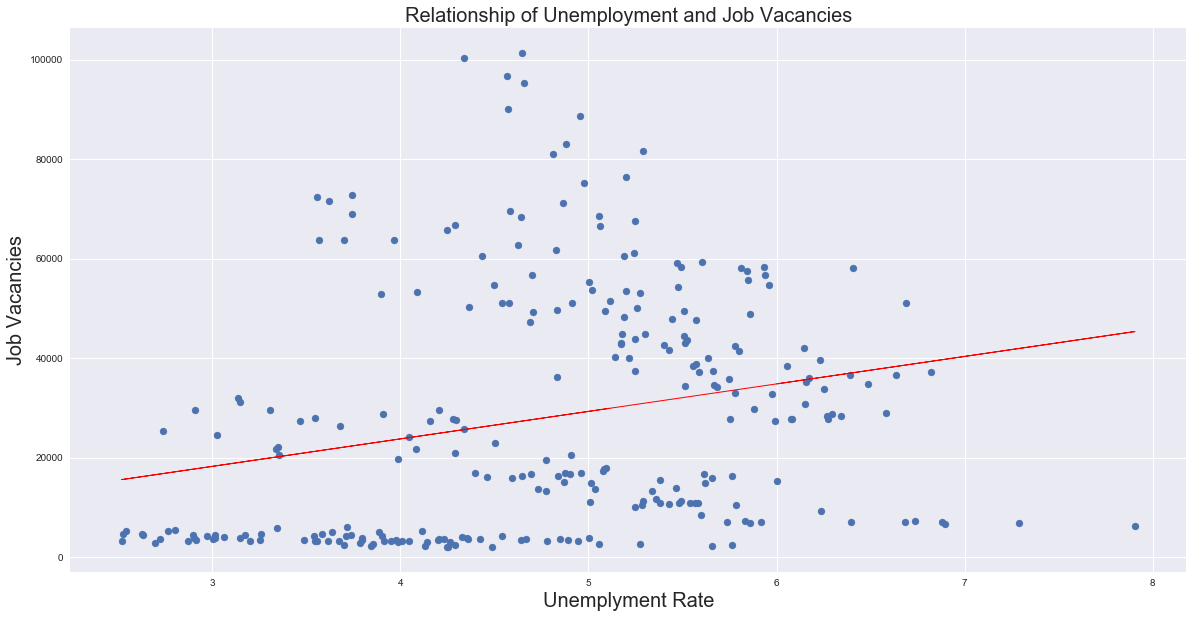

                            OLS Regression Results                            
Dep. Variable:            Job_Vacancy   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     390.6
Date:                Wed, 17 Jan 2018   Prob (F-statistic):           4.71e-54
Time:                        16:17:18   Log-Likelihood:                -3055.4
No. Observations:                 266   AIC:                             6113.
Df Residuals:                     265   BIC:                             6116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Unmp Rate   5857.7845    296.377     19.765      0.0

In [337]:
from matplotlib import pyplot as plt
import statsmodels.api as sm

plt.scatter(result['Unmp Rate'], result.Job_Vacancy, label = 'Scatter')
plt.ylabel ('Job Vacancies',fontsize = 20)
plt.xlabel ('Unemplyment Rate',fontsize = 20)
plt.title('Relationship of Unemployment and Job Vacancies',fontsize = 20)

slope, intercept, r_value, p_value, std_err = linregress(result['Unmp Rate'], result.Job_Vacancy)
line = [slope*xi + intercept for xi in result['Unmp Rate']]
plt.plot(result['Unmp Rate'],line,'r-', linewidth=1,label = 'Regression')
plt.show()

model = sm.OLS(result.Job_Vacancy, result['Unmp Rate']).fit()
print(model.summary())

In [338]:
print 'correction coefficient: ', r_value
print 'standard error of the estimate: ',std_err

correction coefficient:  0.241069096846
standard error of the estimate:  1369.20635023


#### I plot the scatter and regression, get the indexes of OLS model regression and calculate the "std_err" and 'r_value'. ( "std_err" that is the standard deviation of a sampling distribution, and 'r_value' is the correction coefficient.)
####  From the figure, the distribution of the scatter is pretty broad. From the calculation, the "std_err" is high.
####  Consulsion: The corelation of the relationship is low !

In [339]:
## A6-3. Select and plot only the data from Victoria. 

In [340]:
VIC_only = result[result['State'] == 'VIC']
VIC_only.head()

,Date,State,Job_Vacancy,Population,Unmp Rate
337,01/03/2006,VIC,51492.4,5048207.0,5.112932
340,01/06/2006,VIC,53746.2,5061266.0,5.021526
343,01/09/2006,VIC,51013.6,5083593.0,4.579141
346,01/12/2006,VIC,55297.1,5103965.0,5.003476
349,01/03/2007,VIC,61757.6,5134074.0,4.828237


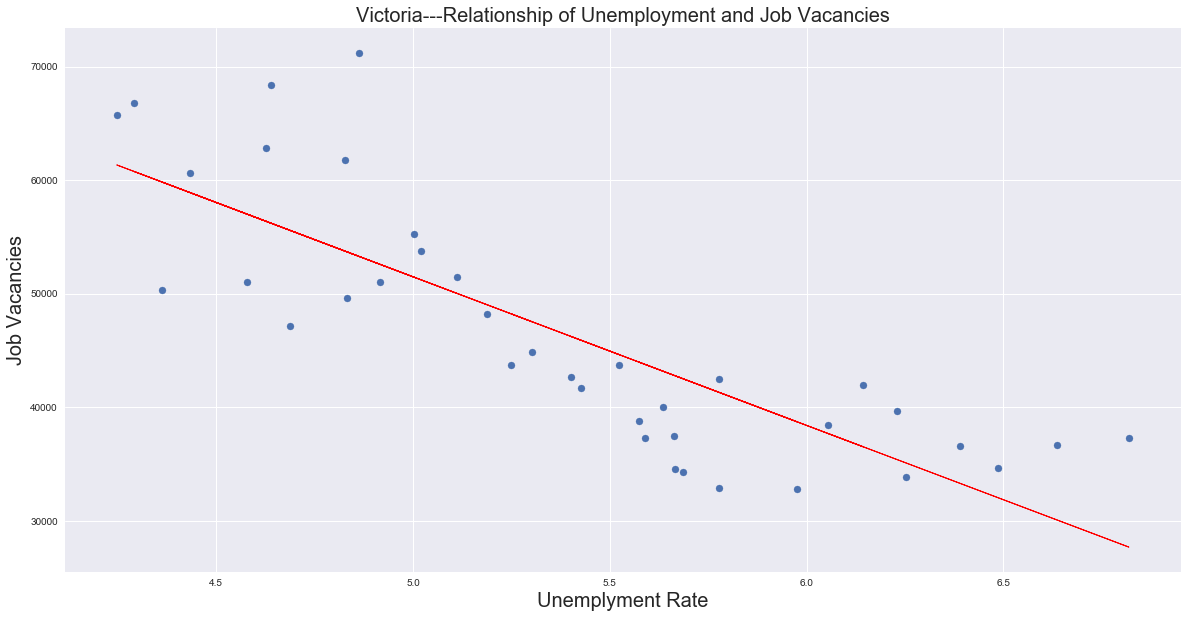

correction coefficient:  -0.818534702346
standard error of the estimate:  1530.17388404


In [341]:
plt.scatter(VIC_only['Unmp Rate'], VIC_only.Job_Vacancy, label = 'Scatter')
plt.ylabel ('Job Vacancies',fontsize = 20)
plt.xlabel ('Unemplyment Rate',fontsize = 20)
plt.title('Victoria---Relationship of Unemployment and Job Vacancies',fontsize = 20)

slope, intercept, r_value, p_value, std_err = linregress(VIC_only['Unmp Rate'], VIC_only.Job_Vacancy)
line = [slope*xi + intercept for xi in VIC_only['Unmp Rate']]
plt.plot(VIC_only['Unmp Rate'],line,'r-', linewidth=1,label = 'Regression')
plt.show()

print 'correction coefficient: ', r_value
print 'standard error of the estimate: ',std_err

#### Now, the relationship is clear, and the relationship of unemployment and job vacancies is nagative: As the unemplyment rate increases, the job vacancies become decreasing.
#### Compared to the former question that has uncertainy values in "State" variable, this question of ''State'' has an only value----Victoria, which improves the accurency of the relationship.

In [342]:
## A6-4. The different populations of the states will influence the number of job vacancies in each. Remove this effect by 
##    introducing a new column called 'Vacancy Rate' which contains the vacancy count divided by the population size, multiplied
##  by 100


In [343]:
result['Vacancy Rate'] = result['Job_Vacancy'] / result['Population'] * 100
result.head()

,Date,State,Job_Vacancy,Population,Unmp Rate,Vacancy Rate
337,01/03/2006,VIC,51492.4,5048207.0,5.112932,1.020014
340,01/06/2006,VIC,53746.2,5061266.0,5.021526,1.061912
343,01/09/2006,VIC,51013.6,5083593.0,4.579141,1.003495
346,01/12/2006,VIC,55297.1,5103965.0,5.003476,1.083415
349,01/03/2007,VIC,61757.6,5134074.0,4.828237,1.202897


In [344]:
## 5. Re-plot the new data. 

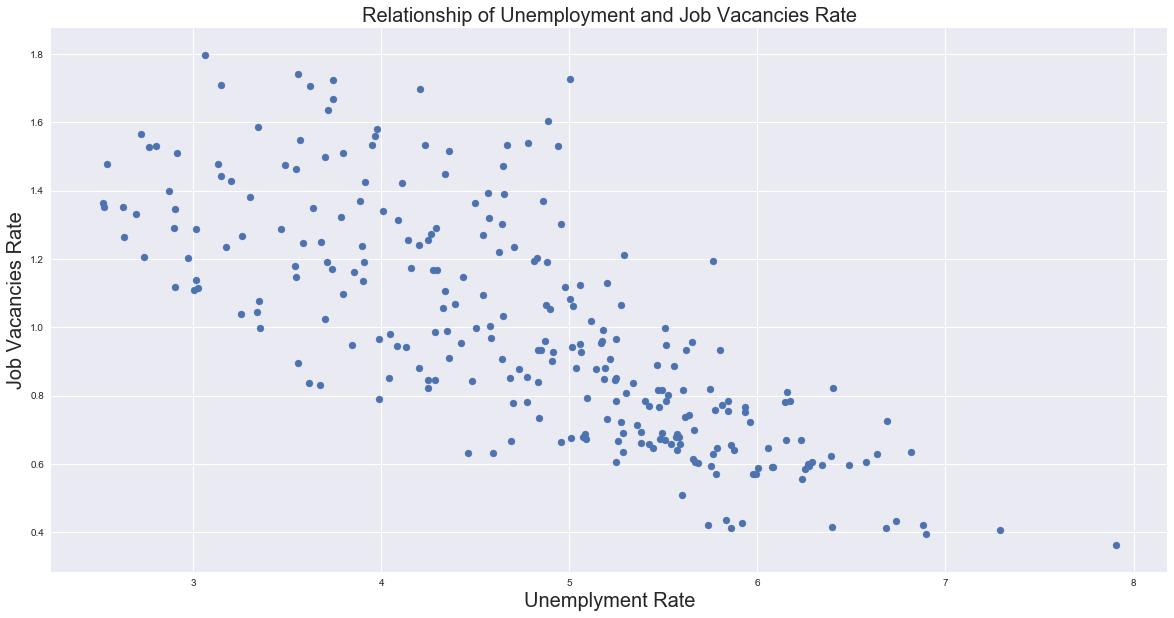

In [356]:
plt.scatter(result['Unmp Rate'], result['Vacancy Rate'])
plt.ylabel ('Job Vacancies Rate',fontsize = 20)
plt.xlabel ('Unemplyment Rate',fontsize = 20)
plt.title('Relationship of Unemployment and Job Vacancies Rate',fontsize = 20)
#plt.plot(result['Unmp Rate'], result['Vacancy Rate'])
plt.show()

#### Yes, there is a negative relationship between unemployment rate and job vacancy rate: As the unempoyment increases, job vacancies decreases, which means that unemployment rate and job vacancies have the contrary changes when other factors of these two indexes are the same. 
#### The amount of job vacancies varies from the different population , so it cannot be the index to measure the condition of job occupancy. The job vacancies rate reflects the ratio of job positon and populaion, so it provides the meaningful index.

### A7. Visualising the Relationship over Time

In [324]:
### A7-1. Build a Motion Chart comparing the job vacancy rate, the unemployment rate, and the population of each state over time.
###       The motion chart should show the job vacancy rate on the x-axis, the unemployment rate on the y-axis and the bubble 
###       size should depend on the population. 

In [346]:
from motionchart.motionchart import MotionChart
import pandas as pd
print ('-----------------------------A7-1-------------------------------')
mChart = MotionChart(df = result, key='Date', x='Vacancy Rate', y='Unmp Rate',  xscale='linear', yscale='linear', 
                     size='Population',category='State' )
mChart.to_notebook()

-----------------------------A7-1-------------------------------


### A7.2
#### a. Tasmania State. Because the green bubble (Tasmania State) has the lowest value in X-axis during the whole period.
#### b. In 2006/7, the Ausrtalian economy was better, while it was worse in 2014/5.Because all the bubbles was more near the Y-axis and more far from X-axis with the date going forward, it means the job vacancies became lower and unemployment became higher, which can be considered that the the economy became worse than the earlier time.
#### c. Compared to the states, Northern Territory ( light green ) have higher job vacancy and lower unemployment  rate.
#### d. Because of the lowest population in Northern Territory, because the bubble zise is the most smallest one.Yes, it is ecnomically to move to NT. Its higher job vacancy and lower unemployment rate means that the resident has more job opportunities and stable employment conditions.
#### e. In the end of 2008 and the start of 2009, all the bubbles move far from the X-axis and move closely to the Y-axis, so it means the higher unemployment rates and lower job vacancies-------The ecomoy became worse. It probably caused by the global economic crisis in 2008.
#### f. Changes in the end of 2009 / early 2009 influenced negatively on States with Big population and positively on Northern and Central Territories with relatively smaller population.


# Task B: Exploratory Analysis on Big Data 

In [ ]:
## B1. Summarising the Data 

In [347]:
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [525]:
print '-----------------------------B1-1--------------------------------'
ir = pd.read_csv('InsuranceRates.csv')
ir.head()

-----------------------------B1-1--------------------------------


,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2014,AK,21989,21989AK0010001,0-20,29.00,NaN
1,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
2,2014,AK,21989,21989AK0020001,Family Option,36.95,NaN
3,2014,AK,21989,21989AK0010001,21,32.00,NaN
4,2014,AK,21989,21989AK0010001,22,32.00,NaN


In [349]:
##a. The possible value for "Age" are :

In [351]:
print (ir.Age.unique())

['0-20' 'Family Option' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60'
 '61' '62' '63' '64' '65 and over']


In [352]:
## b. How many states are there?

In [353]:
print (ir. StateCode.nunique())

39


In [354]:
## c. Rows and Columns are:

In [357]:
print(ir.shape)

(12694445, 7)


The the amount of row is 12694444, the amount of columns is 7

In [358]:
## d. How many years does the data cover?

In [359]:
print(ir.BusinessYear.unique())

[2014 2015 2016]


In [360]:
## e. How many unique 'PlanId's are there?

In [361]:
ir.PlanId.nunique()

16808

In [362]:
## f. What are the average, maximum and minimum values for the monthly insurance premium cost for an individual?

In [365]:
ir_notnull_1 = ir[ir.IndividualRate.notnull()]
ir_notnull_1
ir_notnull_2 = ir[ir.IndividualTobaccoRate.notnull()]
print  'For Individual without Tobacco:'
print '  minimum: ',ir_notnull_1['IndividualRate'].min()
print '  maximum: ',ir_notnull_1['IndividualRate'].max()
print '  average: ',ir_notnull_1['IndividualRate'].mean()

print  'For Individual with Tobacco:'
print '  minimum: ',ir_notnull_2['IndividualTobaccoRate'].min()
print '  maximum: ',ir_notnull_2['IndividualTobaccoRate'].max()
print '  average: ',ir_notnull_2['IndividualTobaccoRate'].mean()

For Individual without Tobacco:
  minimum:  0.0
  maximum:  999999.0
  average:  4098.02645858
For Individual with Tobacco:
  minimum:  41.73
  maximum:  6604.61
  average:  543.691079197


In [366]:
## g. Do those values seem reasonable to you?

Yes, the values of individuals without tobacco are more than those of individuals with tobacco. Because these people who have the smoking habit have more risks to have disease, which will cause the insurance company will give them more insurance premium payment. Therefore, the lower insurance rate for smoking people can avoid insurance company paying more.


In [367]:
## h. The rows of IndividualTobaccoRate without non-empty is :

In [368]:
ir.IndividualTobaccoRate.count()

4932349

In [369]:
## i. Among these rows, how much more on average do smokers pay for their insurance?

In [370]:
ir.IndividualTobaccoRate.median()

463.29

### B2. Investigating Individual Insurance Costs

In [371]:
## B2-1 Show the distribution of ‘IndividualRate’ values using a histogram.

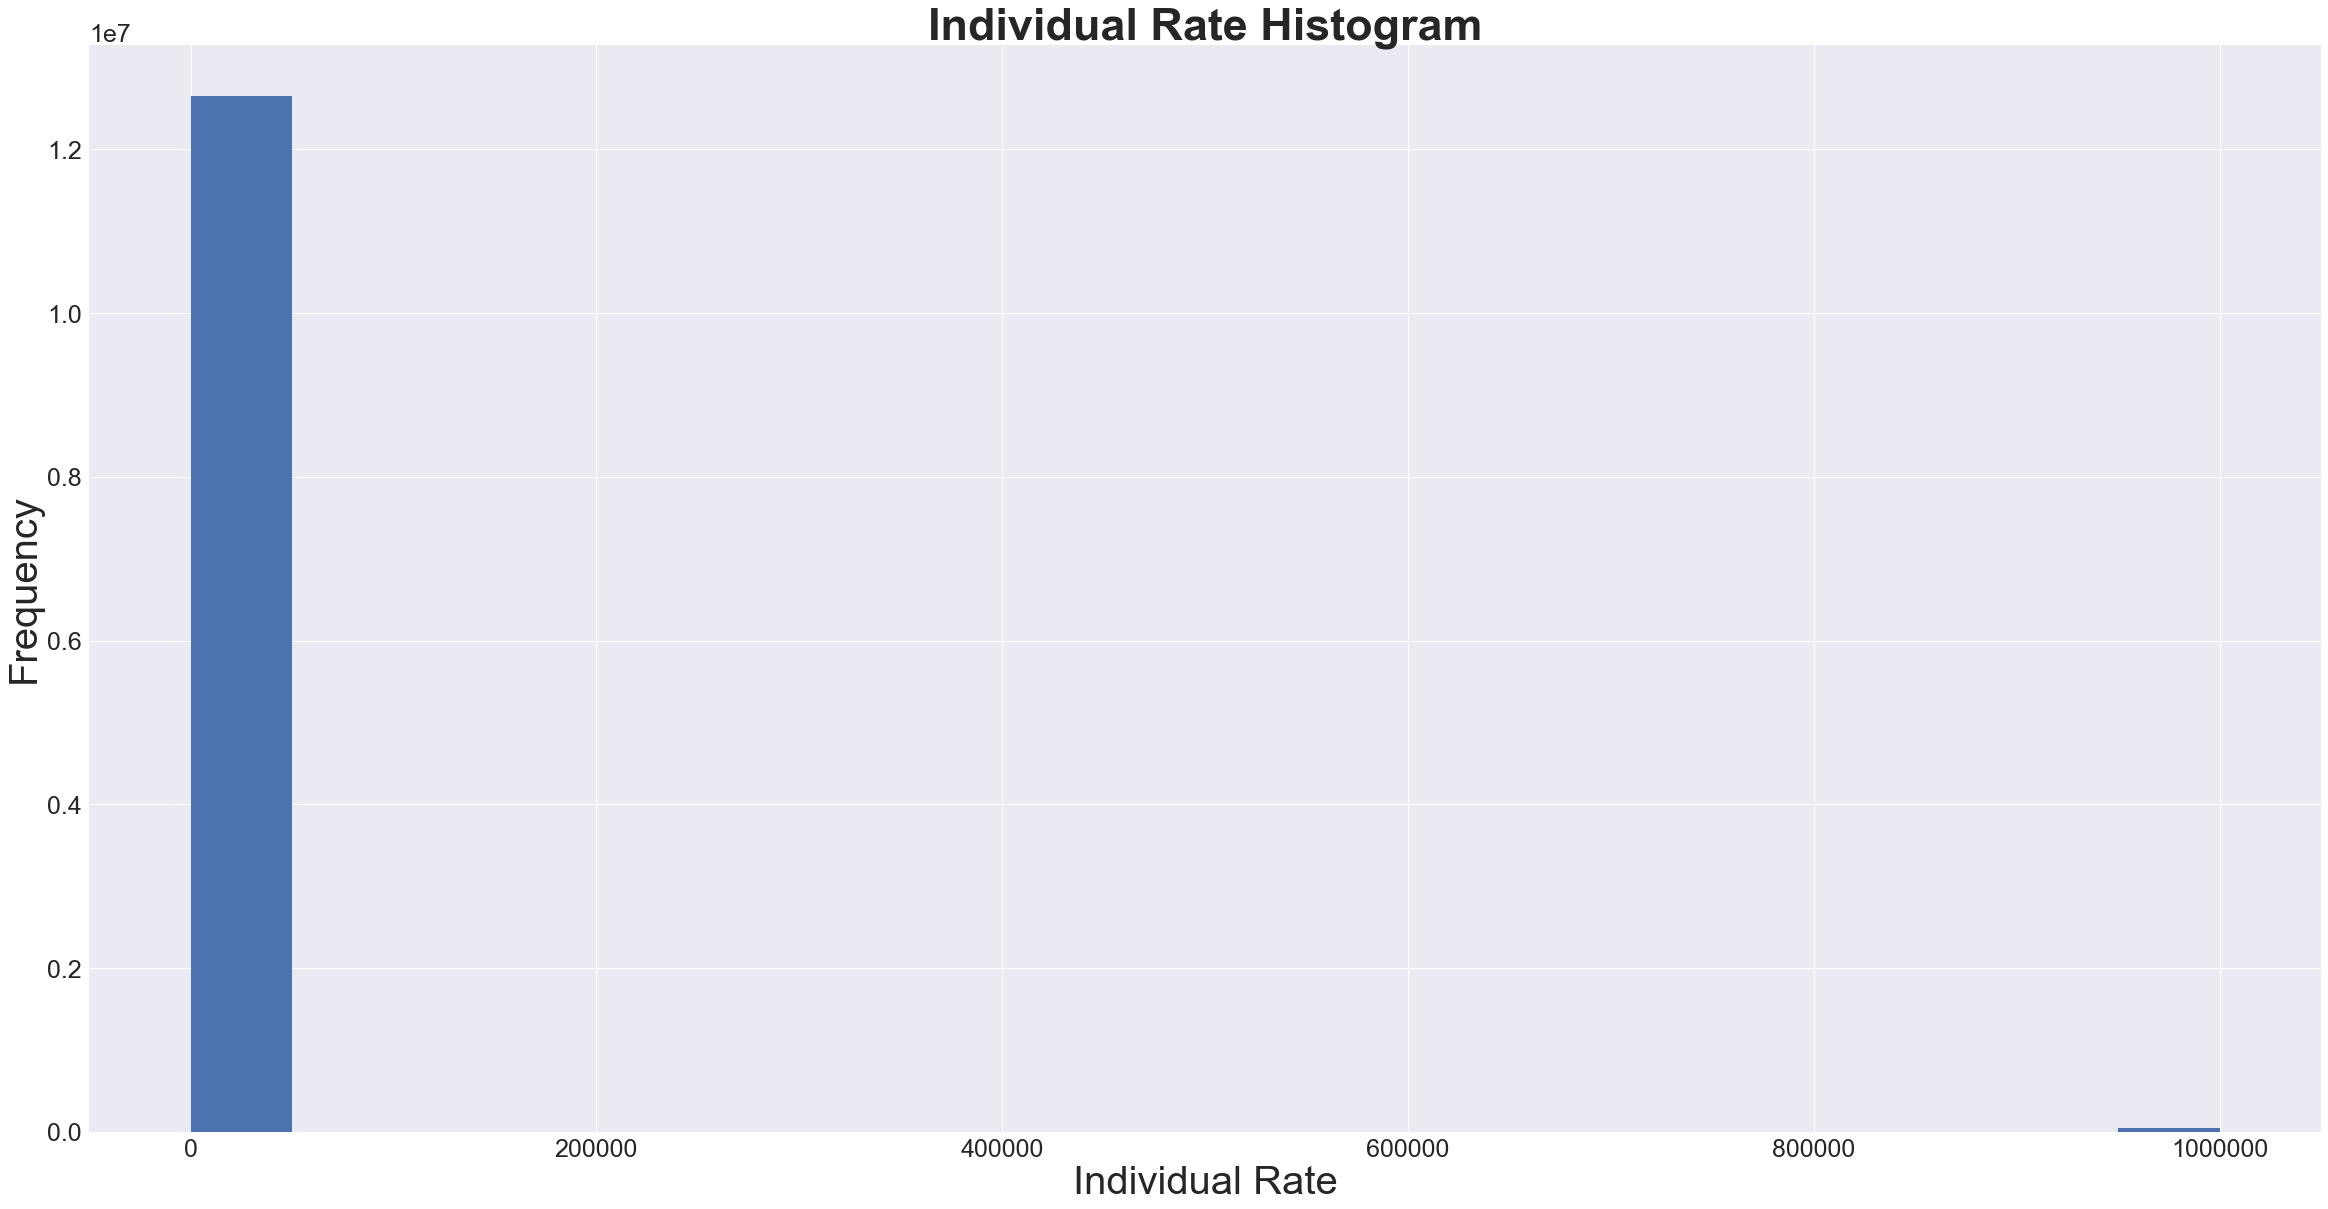

In [382]:
import matplotlib 
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
ir.IndividualRate.hist(bins = 20) 
plt.rcParams["figure.figsize"] = (40,20)
plt.ylabel ('Frequency',fontsize = 40)
plt.xlabel ('Individual Rate',fontsize = 40)
plt.title('Individual Rate Histogram',fontsize = 45, fontweight = 'bold')
plt.show()

In [373]:
## B2-2. Remove rows with insurance premiums of 0 (or less) and over 2000. (Use this data from now on.) Generate a new histogram
##       with a larger number of bins (say 200).

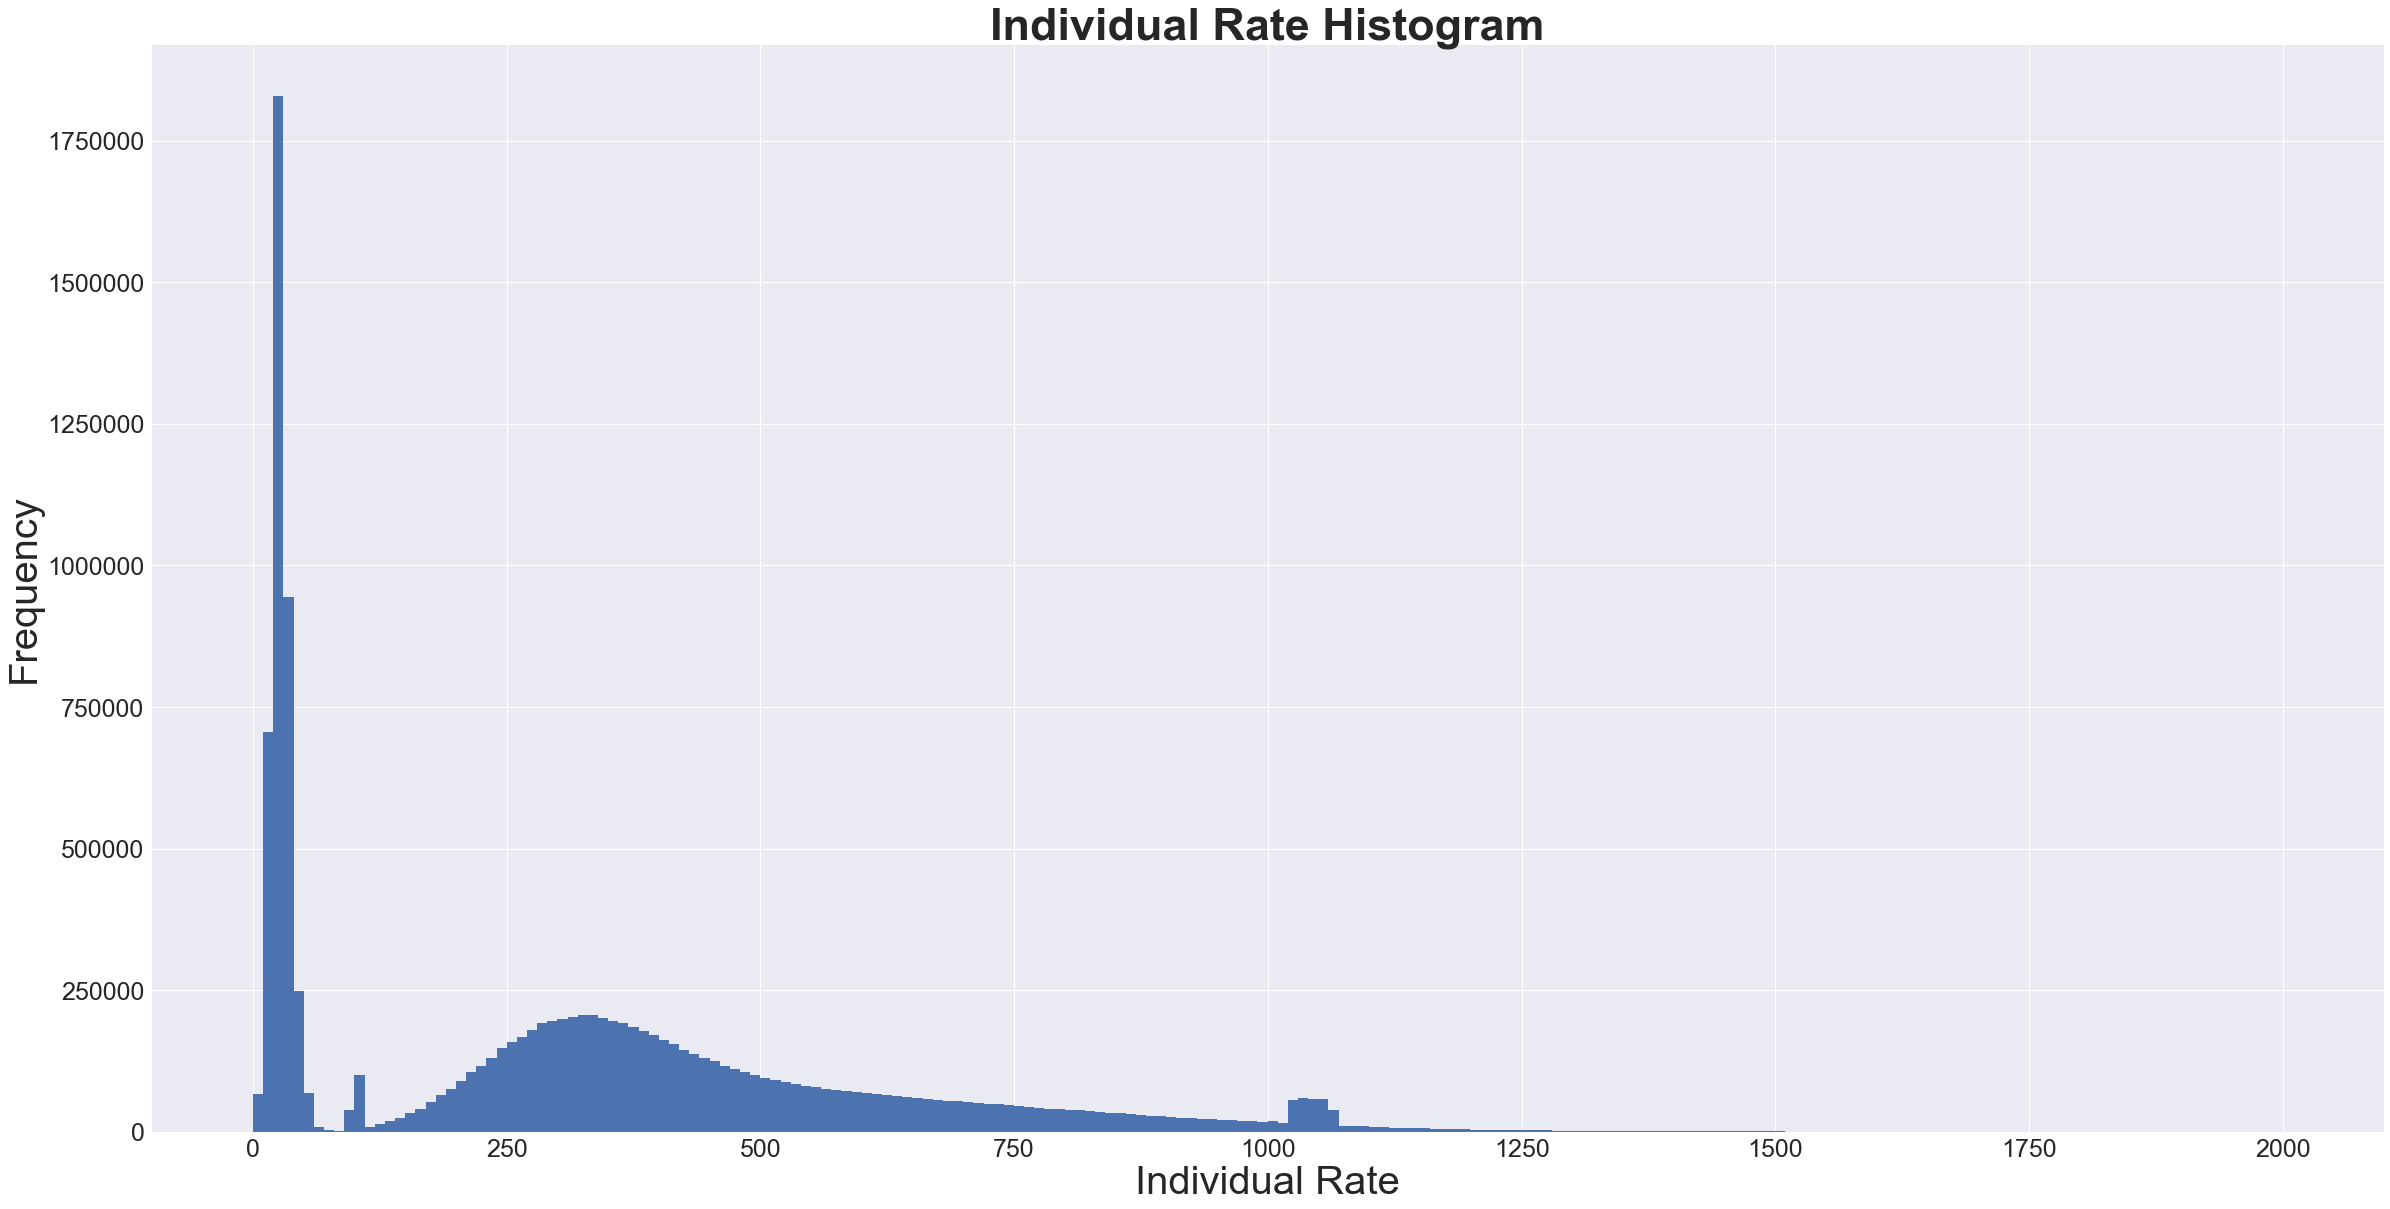

In [385]:
less = ir.loc[ir['IndividualRate'] < 2000]
more = less.loc[less['IndividualRate'] > 0]
more.IndividualRate.hist(bins = 200) 
plt.ylabel ('Frequency',fontsize = 40)
plt.xlabel ('Individual Rate',fontsize = 40)
plt.title('Individual Rate Histogram',fontsize = 45, fontweight = 'bold')
plt.show()

a. Yes, the distribution is more sensible.
b. 4 groups.It can be measured by the frequency of distribution: The higher the frequency is, the more the distribution is.  
   From the figure, 4 ranges of the individual rate is relatively obvious among the all range.

### B3. Variation in Costs over Time and with Age (4 marks

In [ ]:
## B3-1. Generate bar charts of insurance costs versus year and age. 

In [386]:
nofam = (more.Age != 'Family Option')
#more(nofam)
nofamtable = more[nofam]
newtab = nofamtable.loc[:, ['Age','IndividualRate']]

In [466]:
pd.set_option('mode.chained_assignment', None)
fun = {'IndividualRate': {'Insurance Cost for Year' : 'median'}}
groupbyYear = more.groupby('BusinessYear').agg(fun)
groupbyYear.columns = groupbyYear.columns.droplevel(0)
groupbyYear = groupbyYear.reset_index()
display(groupbyYear.head())

funny = {'IndividualRate': {'Insurance Cost for Age' : 'mean' }}
groupbyAge = nofamtable.groupby('Age').agg(funny)
groupbyAge.columns = groupbyAge.columns.droplevel(0)
groupbyAge = groupbyAge.reset_index()
display(groupbyAge.head())

,BusinessYear,Insurance Cost for Year
0,2014,298.62
1,2015,306.49
2,2016,316.35


,Age,Insurance Cost for Age
0,0-20,122.333209
1,21,215.076072
2,22,215.146955
3,23,215.231048
4,24,215.330214


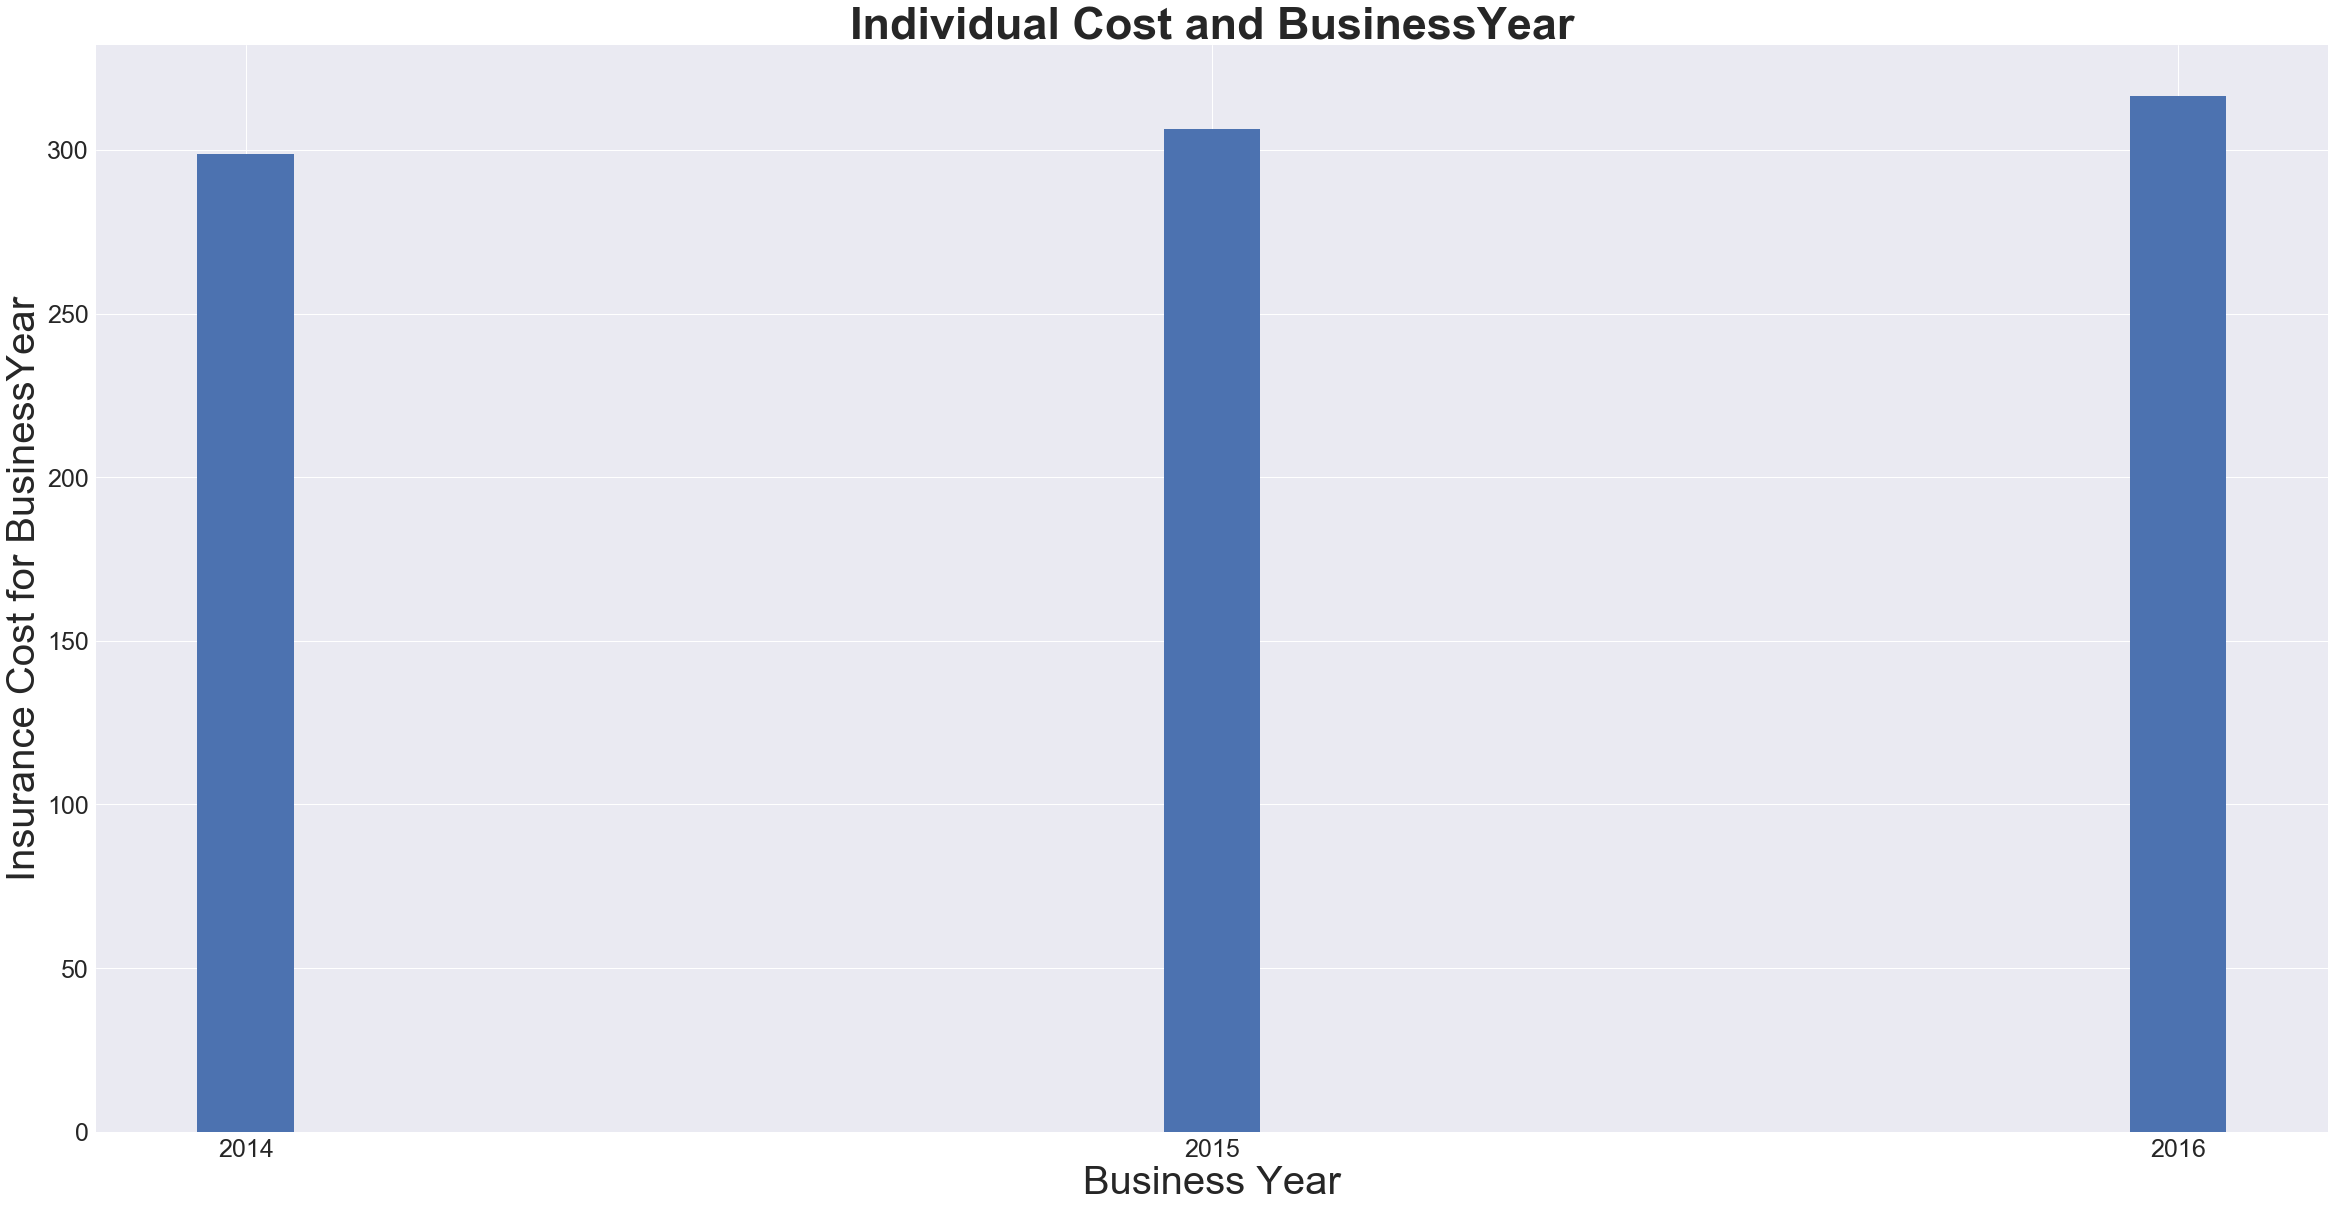

In [459]:
x = np.array(groupbyYear.BusinessYear)
y = np.array(groupbyYear['Insurance Cost for Year'])
my_xticks = groupbyYear.BusinessYear


width = 0.1
fig,ax = plt.subplots()

rects = ax.bar(groupbyYear['BusinessYear'], groupbyYear['Insurance Cost for Year'], width)
ax.set_ylabel('IndividualRate')
ax.set_title('BusinessYear and Individual Rate')

plt.xticks(x, my_xticks)

plt.ylabel ('Insurance Cost for BusinessYear',fontsize = 40)
plt.xlabel ('Business Year',fontsize = 40)
plt.title('Individual Cost and BusinessYear',fontsize = 45, fontweight = 'bold')
plt.show()

a. These two figures show that insurance policies are becoming more expensive over time, because
the medain insurance cost is increasing.

The median is a commonly used measure of the properties of a data set in statistics and probability theory. The basic advantage of the median in describing data compared to the mean (often simply described as the "average") is that it is not skewed so much by extremely large or small values, and so it may give a better idea of a "typical" value. 

Therefore, the median is a more scientific reference to show the common level of the insurance policies.

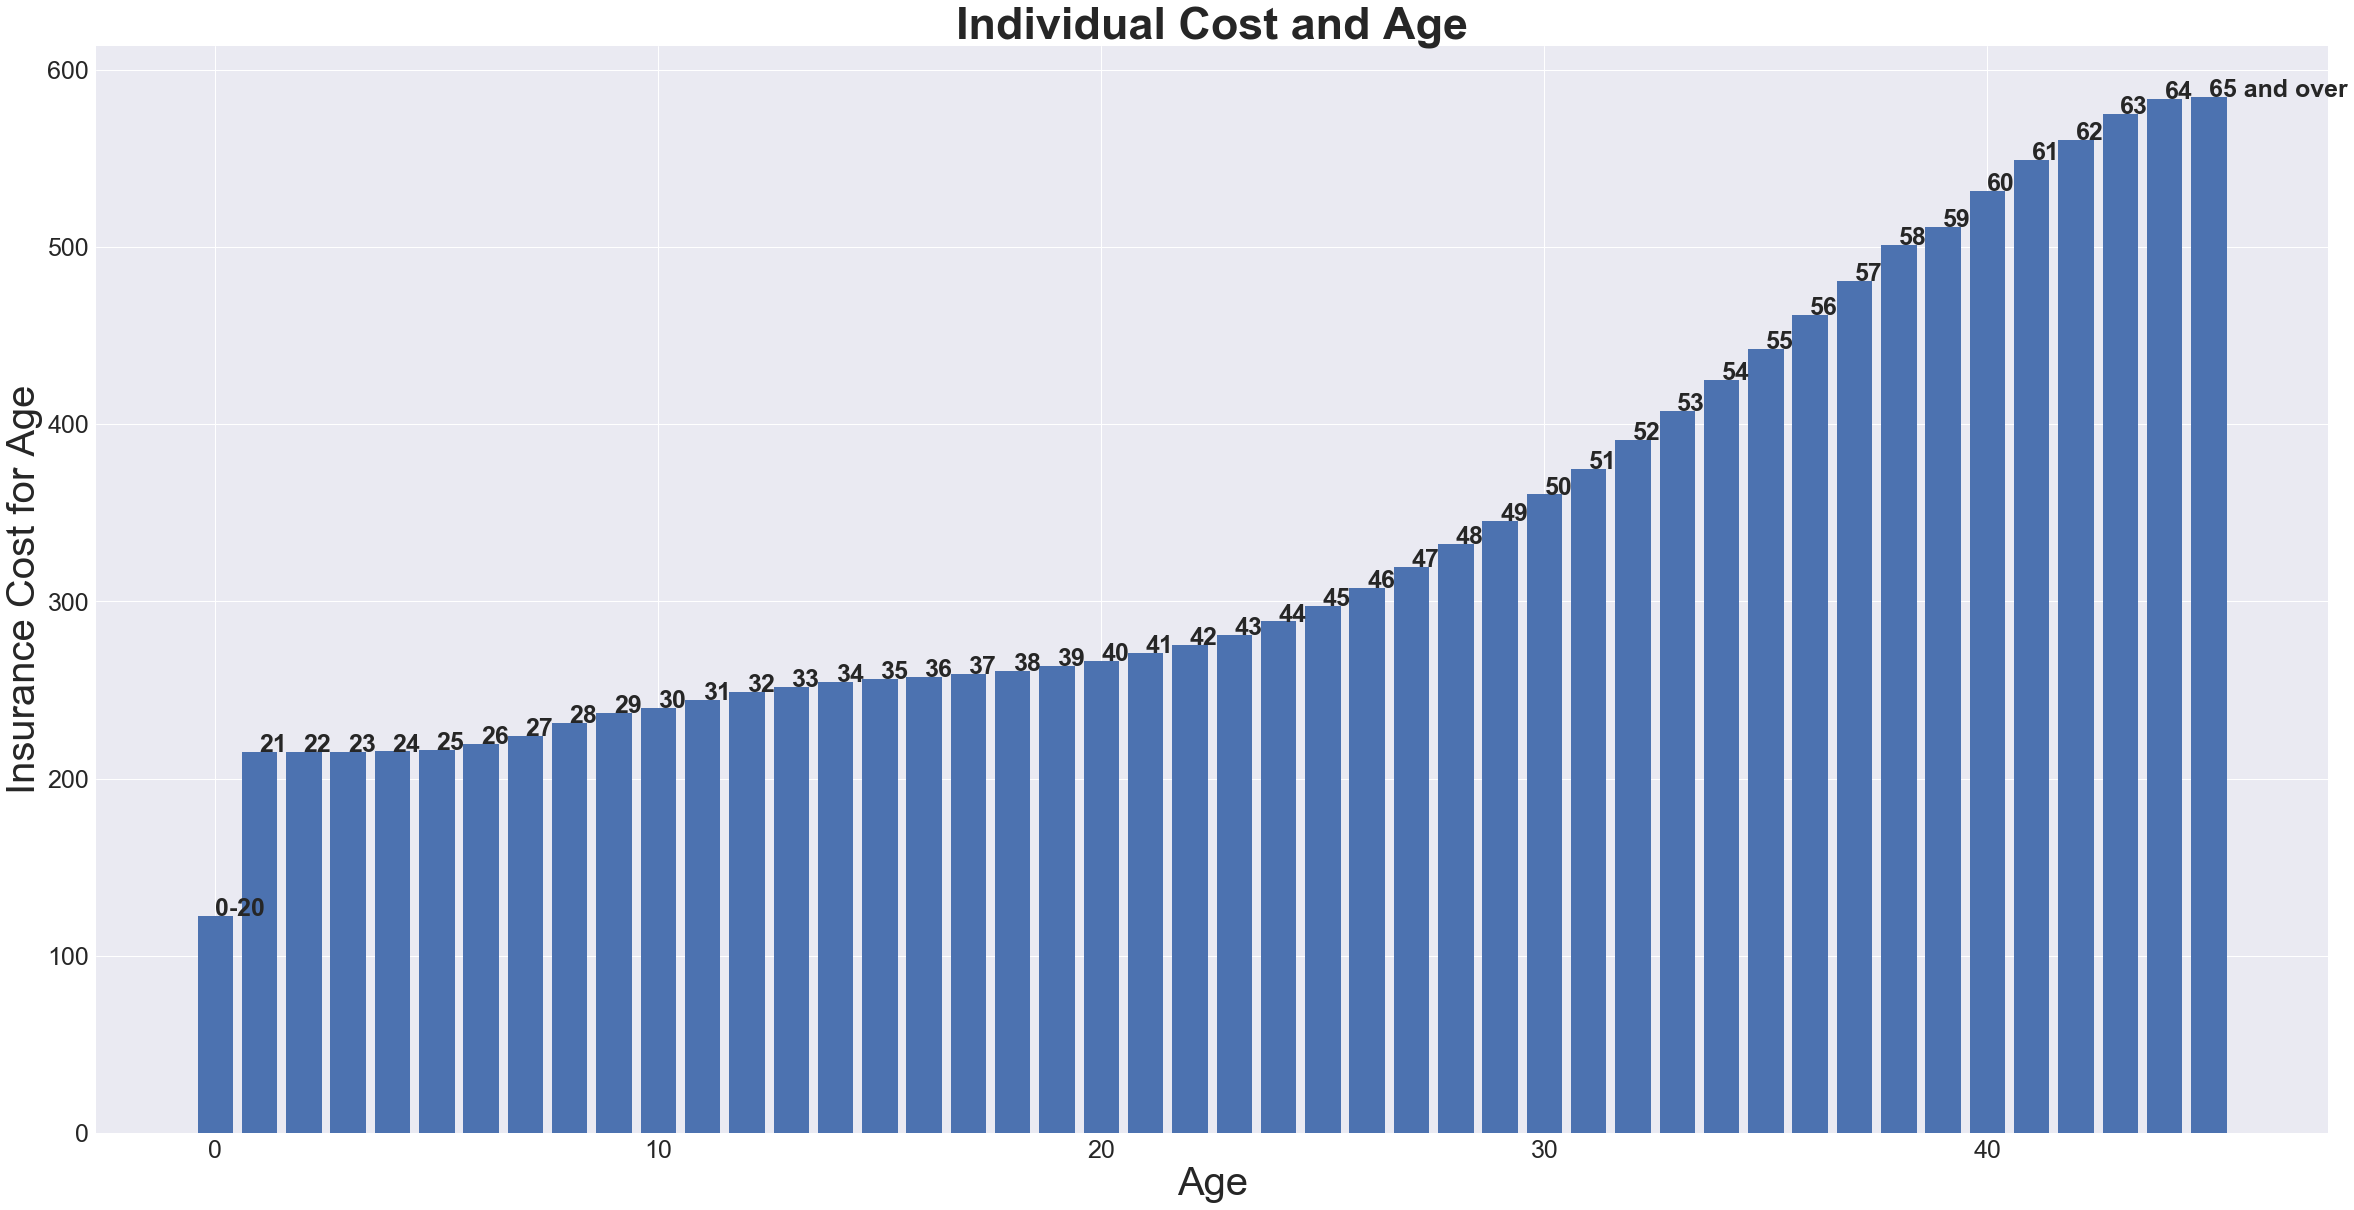

In [499]:
import numpy as np
import matplotlib.pyplot as plt


x = groupbyAge.index
y = groupbyAge['Insurance Cost for Age']

width = 0.5
fig,ax = plt.subplots()

rects = ax.bar(x, y)
ax.set_ylabel('Insurance Cost for Age', fontsize = 40)
ax.set_xlabel('Age', fontsize = 40)
ax.set_title('Individual Cost and Age',fontsize = 45, fontweight = 'bold')
for i, v in enumerate(groupbyAge.Age):
    ax.annotate(v,(x[i],y[i]) ,fontweight='bold', fontsize = 25)

plt.show()

b. With the rising of the age of the person, the insurance becomes increasing.
   Especially, among the elderly people who are over 50 year old, the growth of the insurance cost become faster.
   On contrary, individuals who are less than 20 years old, the insurance cost is pretty low.

## B4. Variation in Costs across States

In [501]:
## 1. Generate a graph containing boxplots summarising the distribution of values for each state.  

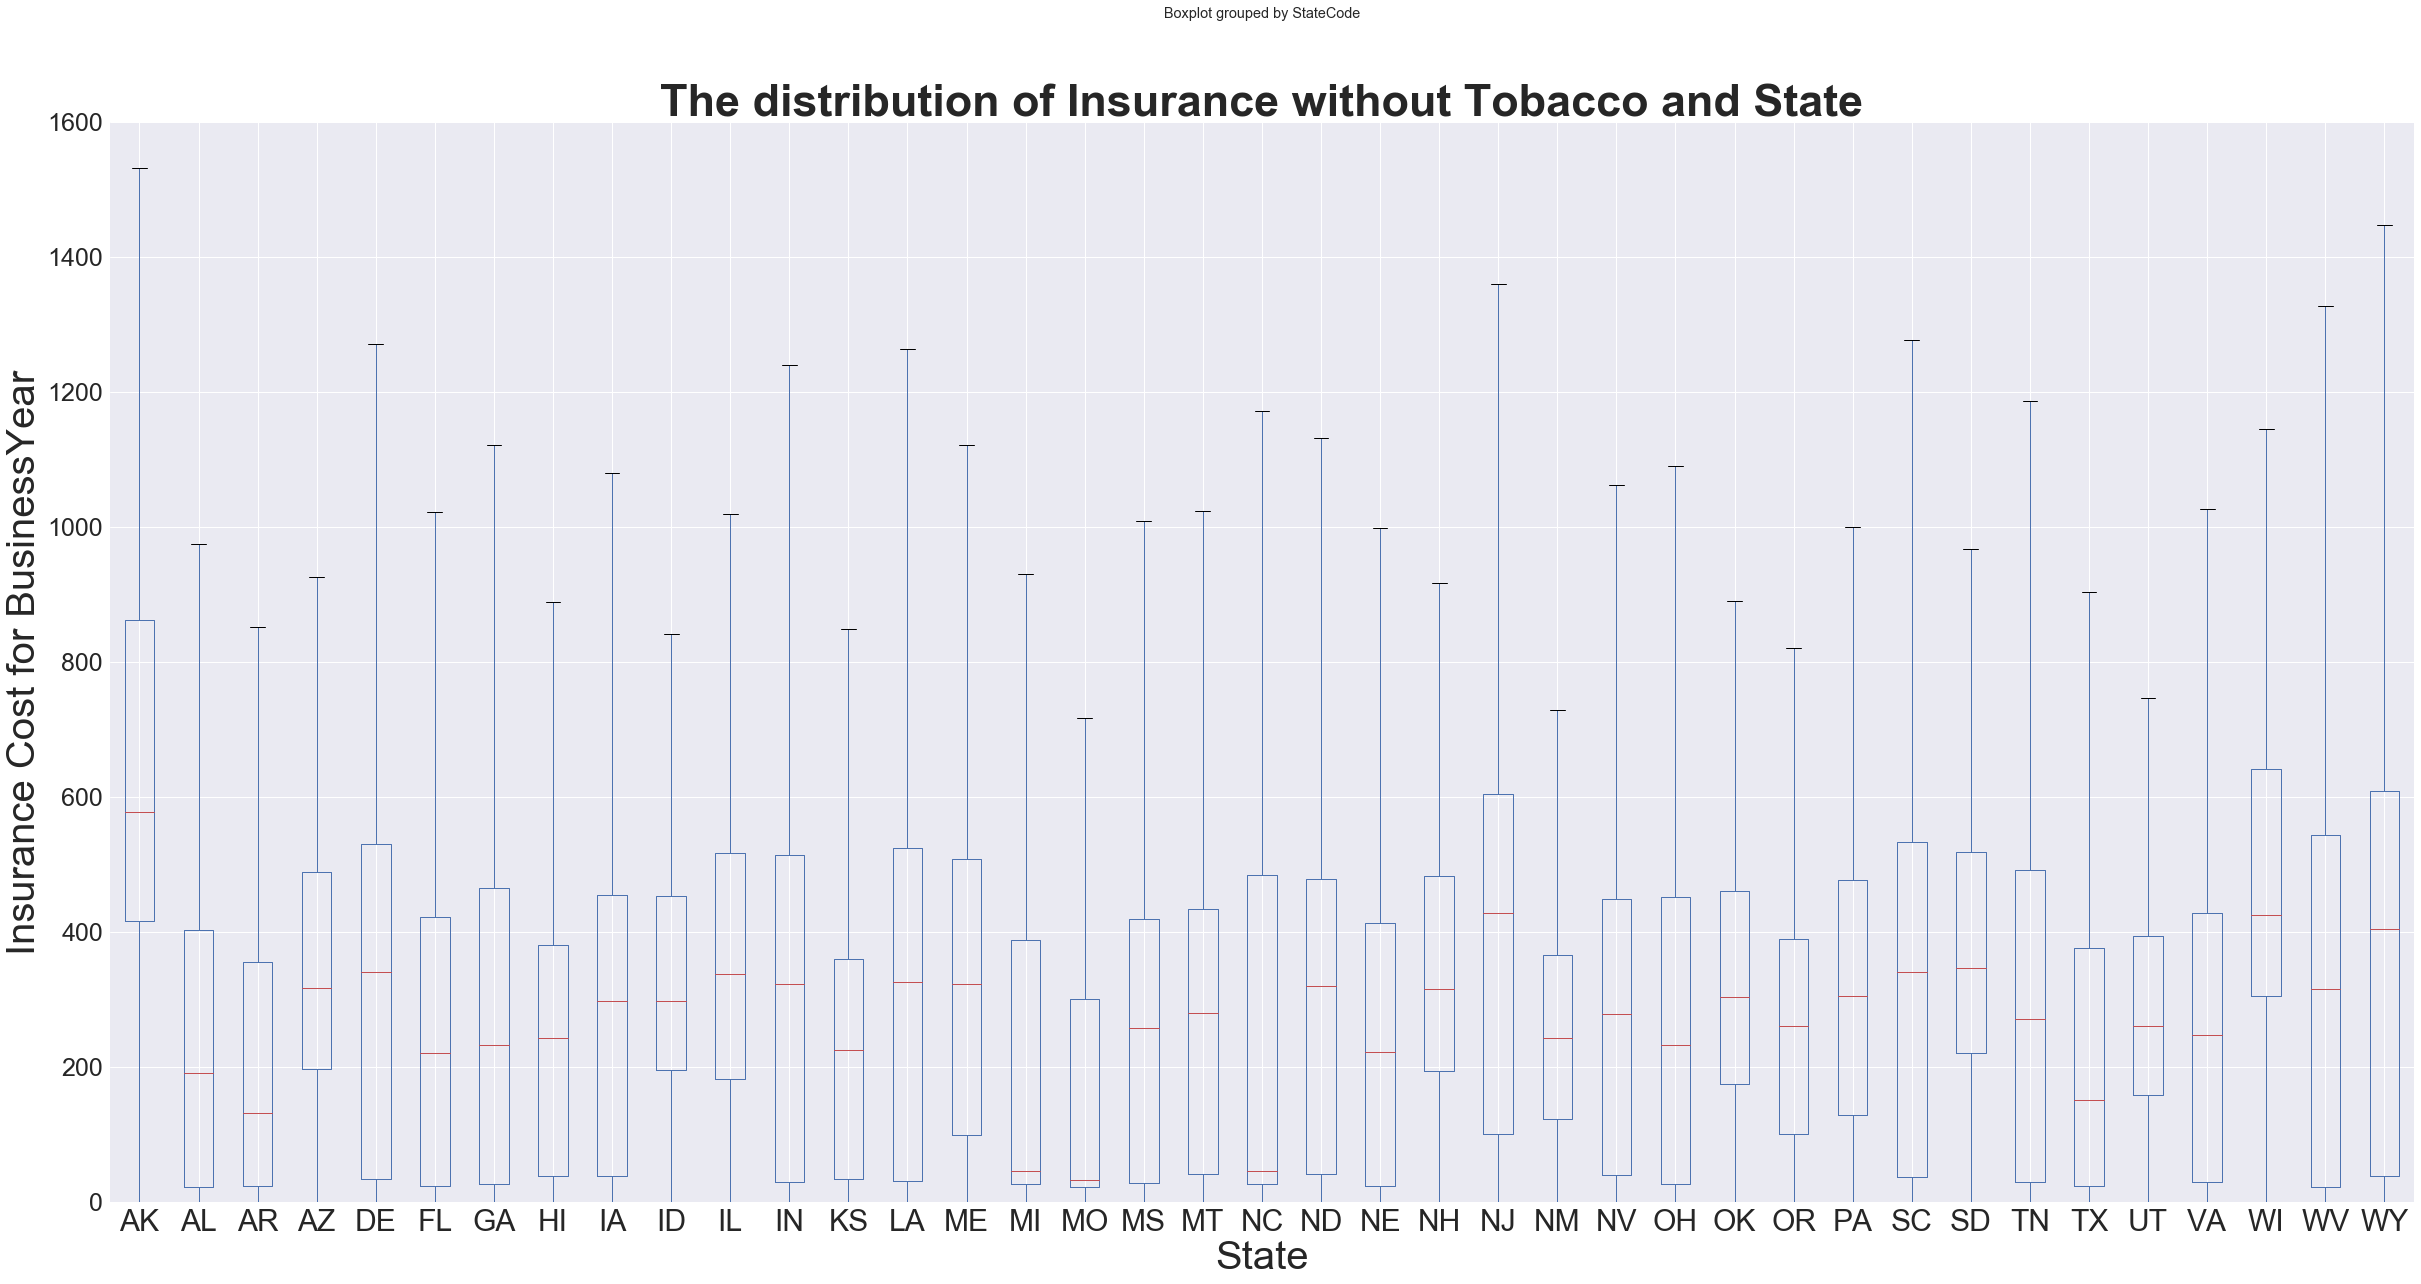

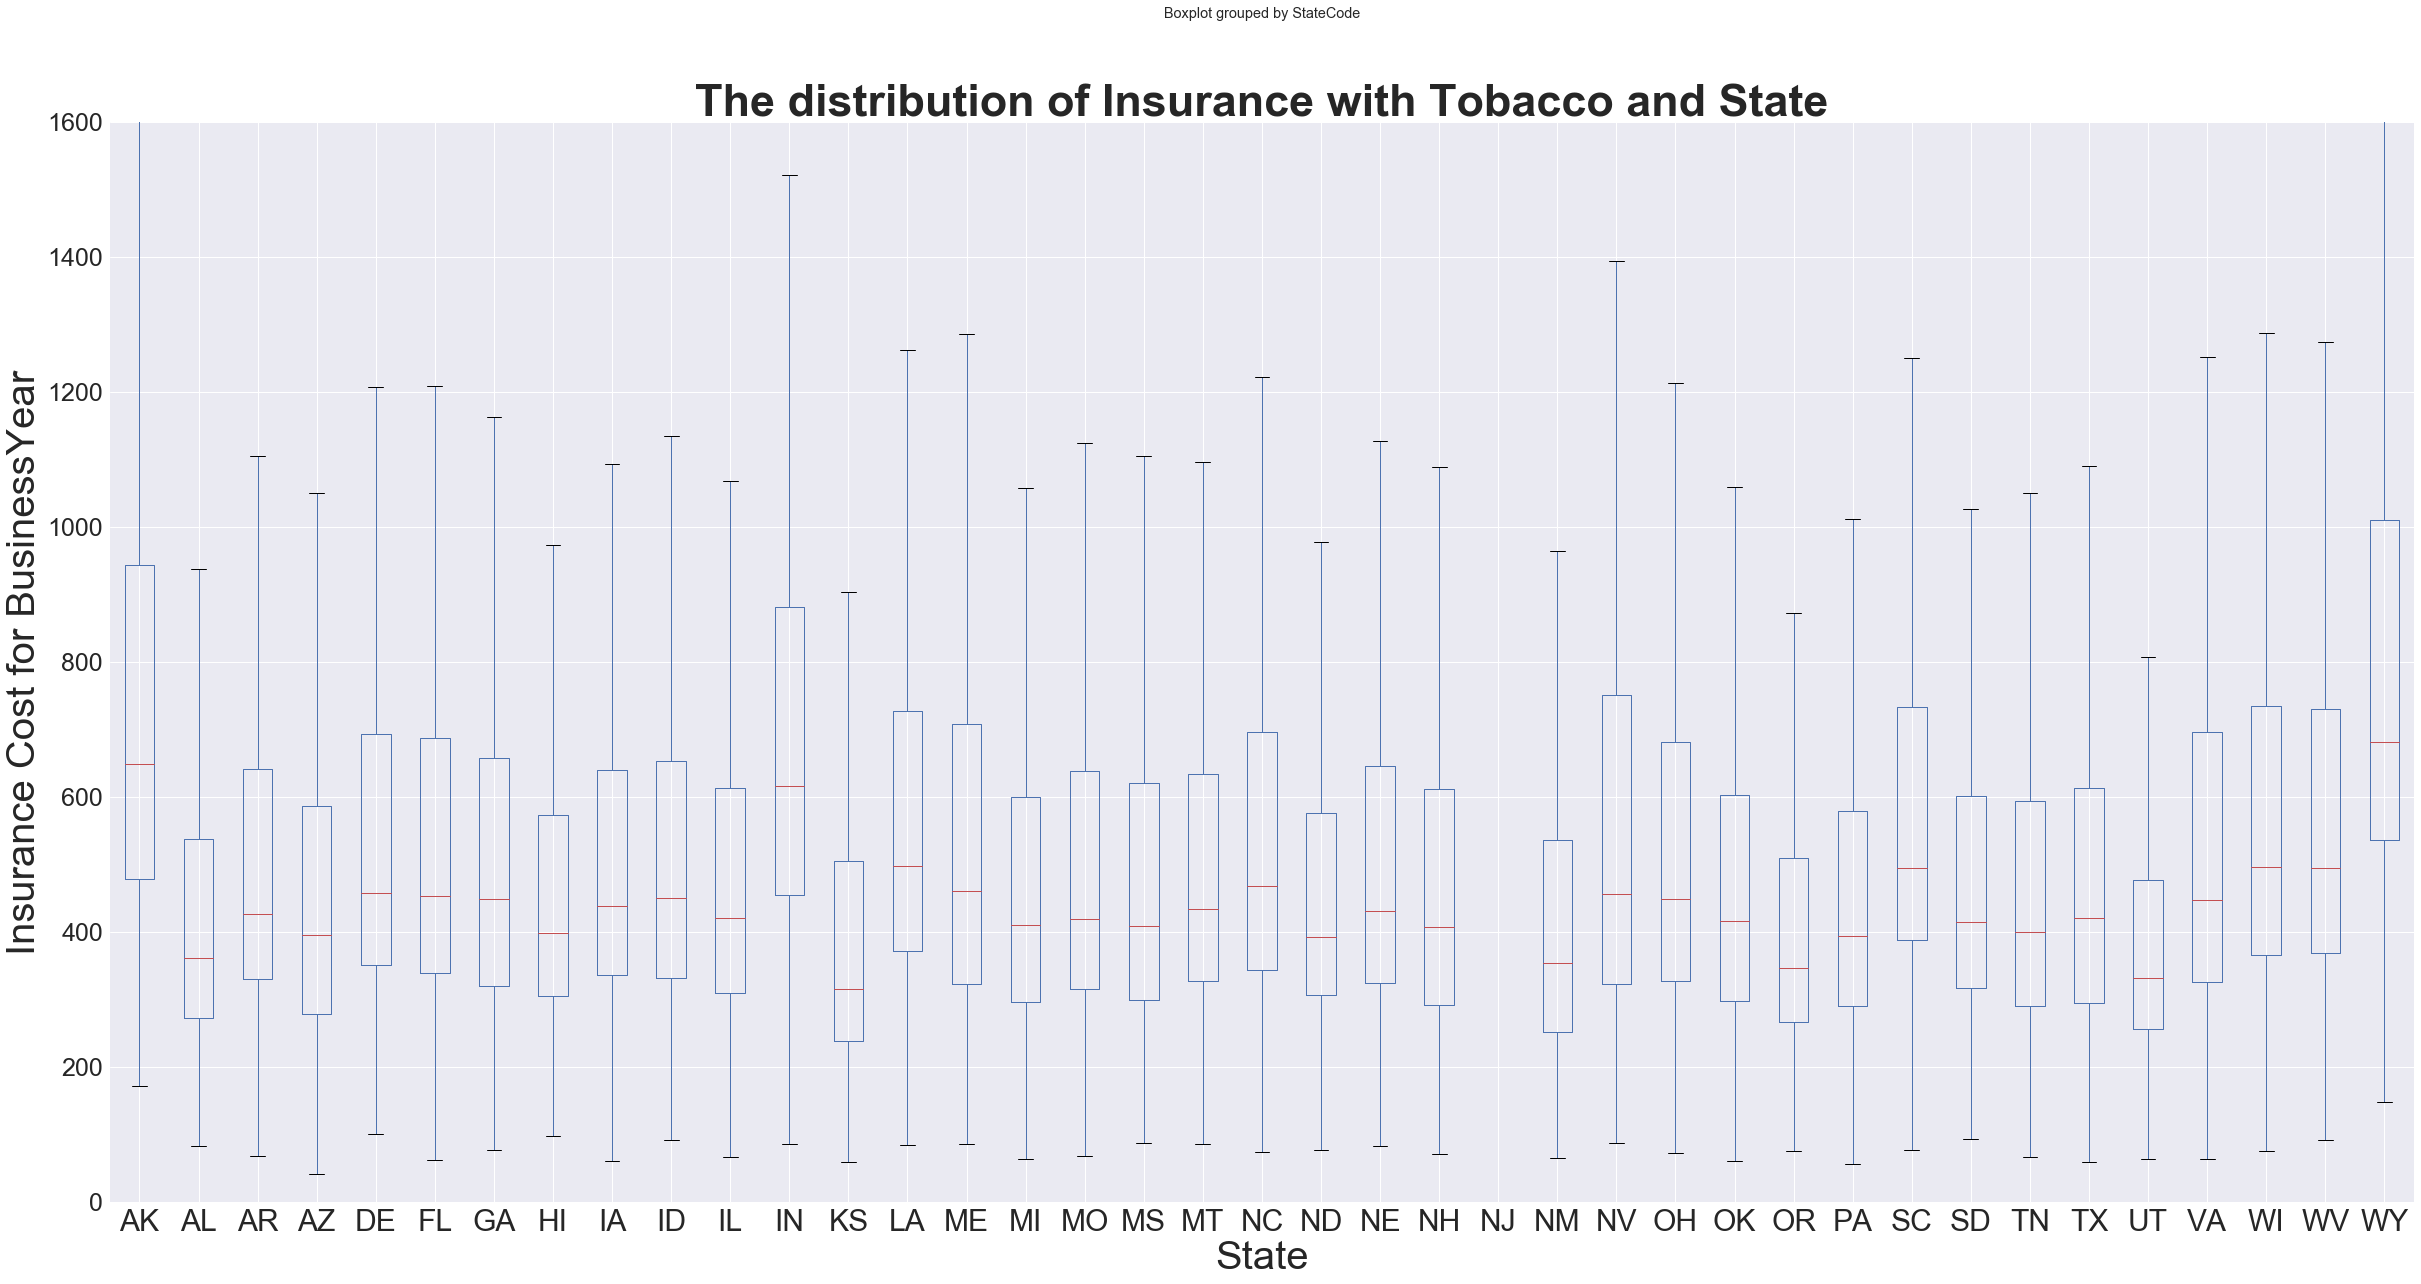

In [515]:
from matplotlib import pyplot as plt1 
from matplotlib import pyplot as plt2 
pd.set_option('mode.chained_assignment', None)
## Without TobaccoRate
ir.boxplot(column = ['IndividualRate'], by = 'StateCode')
plt1.ylim(0,1600)
plt1.xticks(fontsize = 30)

plt1.ylabel ('Insurance Cost for BusinessYear',fontsize = 40)
plt1.xlabel ('State',fontsize = 40)

plt1.title('The distribution of Insurance without Tobacco and State',fontsize = 45, fontweight = 'bold')
plt1.show()

## With TobaccoRate
ir.boxplot(column = ['IndividualTobaccoRate'], by = 'StateCode')
plt2.ylim(0,1600)
plt2.xticks(fontsize = 30)

plt2.ylabel ('Insurance Cost for BusinessYear',fontsize = 40)
plt2.xlabel ('State',fontsize = 40)

plt1.title('The distribution of Insurance with Tobacco and State',fontsize = 45, fontweight = 'bold')
plt2.show()
plt1.show()

In [551]:
## a. What is the difference between the lowest and the highest median insurance rates? 

#### From the two figures:
    For Insurance with Tobacco, the lowest state is MO, the highest state is AK.
    For Insurance without Tobacco, the lowest state is KS, the highest state is WY.

In [572]:
filt1 = ir.loc[ir['StateCode'] == 'AK']
filt1 ['IndividualRate'].median()

filt2 = ir.loc[ir['StateCode'] == 'MO']
filt2 ['IndividualRate'].median()

print 'The difference of the lowest and the highest median insurance rate:'
print '    For Insurance without Tobacco', (filt1['IndividualRate'].median() - filt2['IndividualRate'].median())



filt3 = ir.loc[ir['StateCode'] == 'WY']
filt3['IndividualTobaccoRate'].median()

filt4 = ir.loc[ir['StateCode'] == 'KS']
filt4['IndividualTobaccoRate'].median()

print '    For Insurance with Tobacco', (filt3['IndividualTobaccoRate'].median() - filt4['IndividualTobaccoRate'].median())

The difference of the lowest and the highest median insurance rate:
    For Insurance without Tobacco 544.0
    For Insurance with Tobacco 365.365


In [573]:
## B4-2. How does the number of insurance issuers vary across states? 

In [574]:
## A.Create a bar chart of the number of insurance companies in each state to see.

In [575]:
funB4_2 = {'IssuerId':{'Company':'nunique'}} 

groupbyB4_2 = ir.groupby('StateCode').agg(funB4_2 )
groupbyB4_2 = groupbyB4_2.reset_index()
groupbyB4_2.columns = groupbyB4_2.columns.droplevel(0)
groupbyB4_2.rename(columns = {'':'State'},inplace = True)
groupbyB4_2.head()

,State,Company
0,AK,13
1,AL,19
2,AR,16
3,AZ,38
4,DE,15


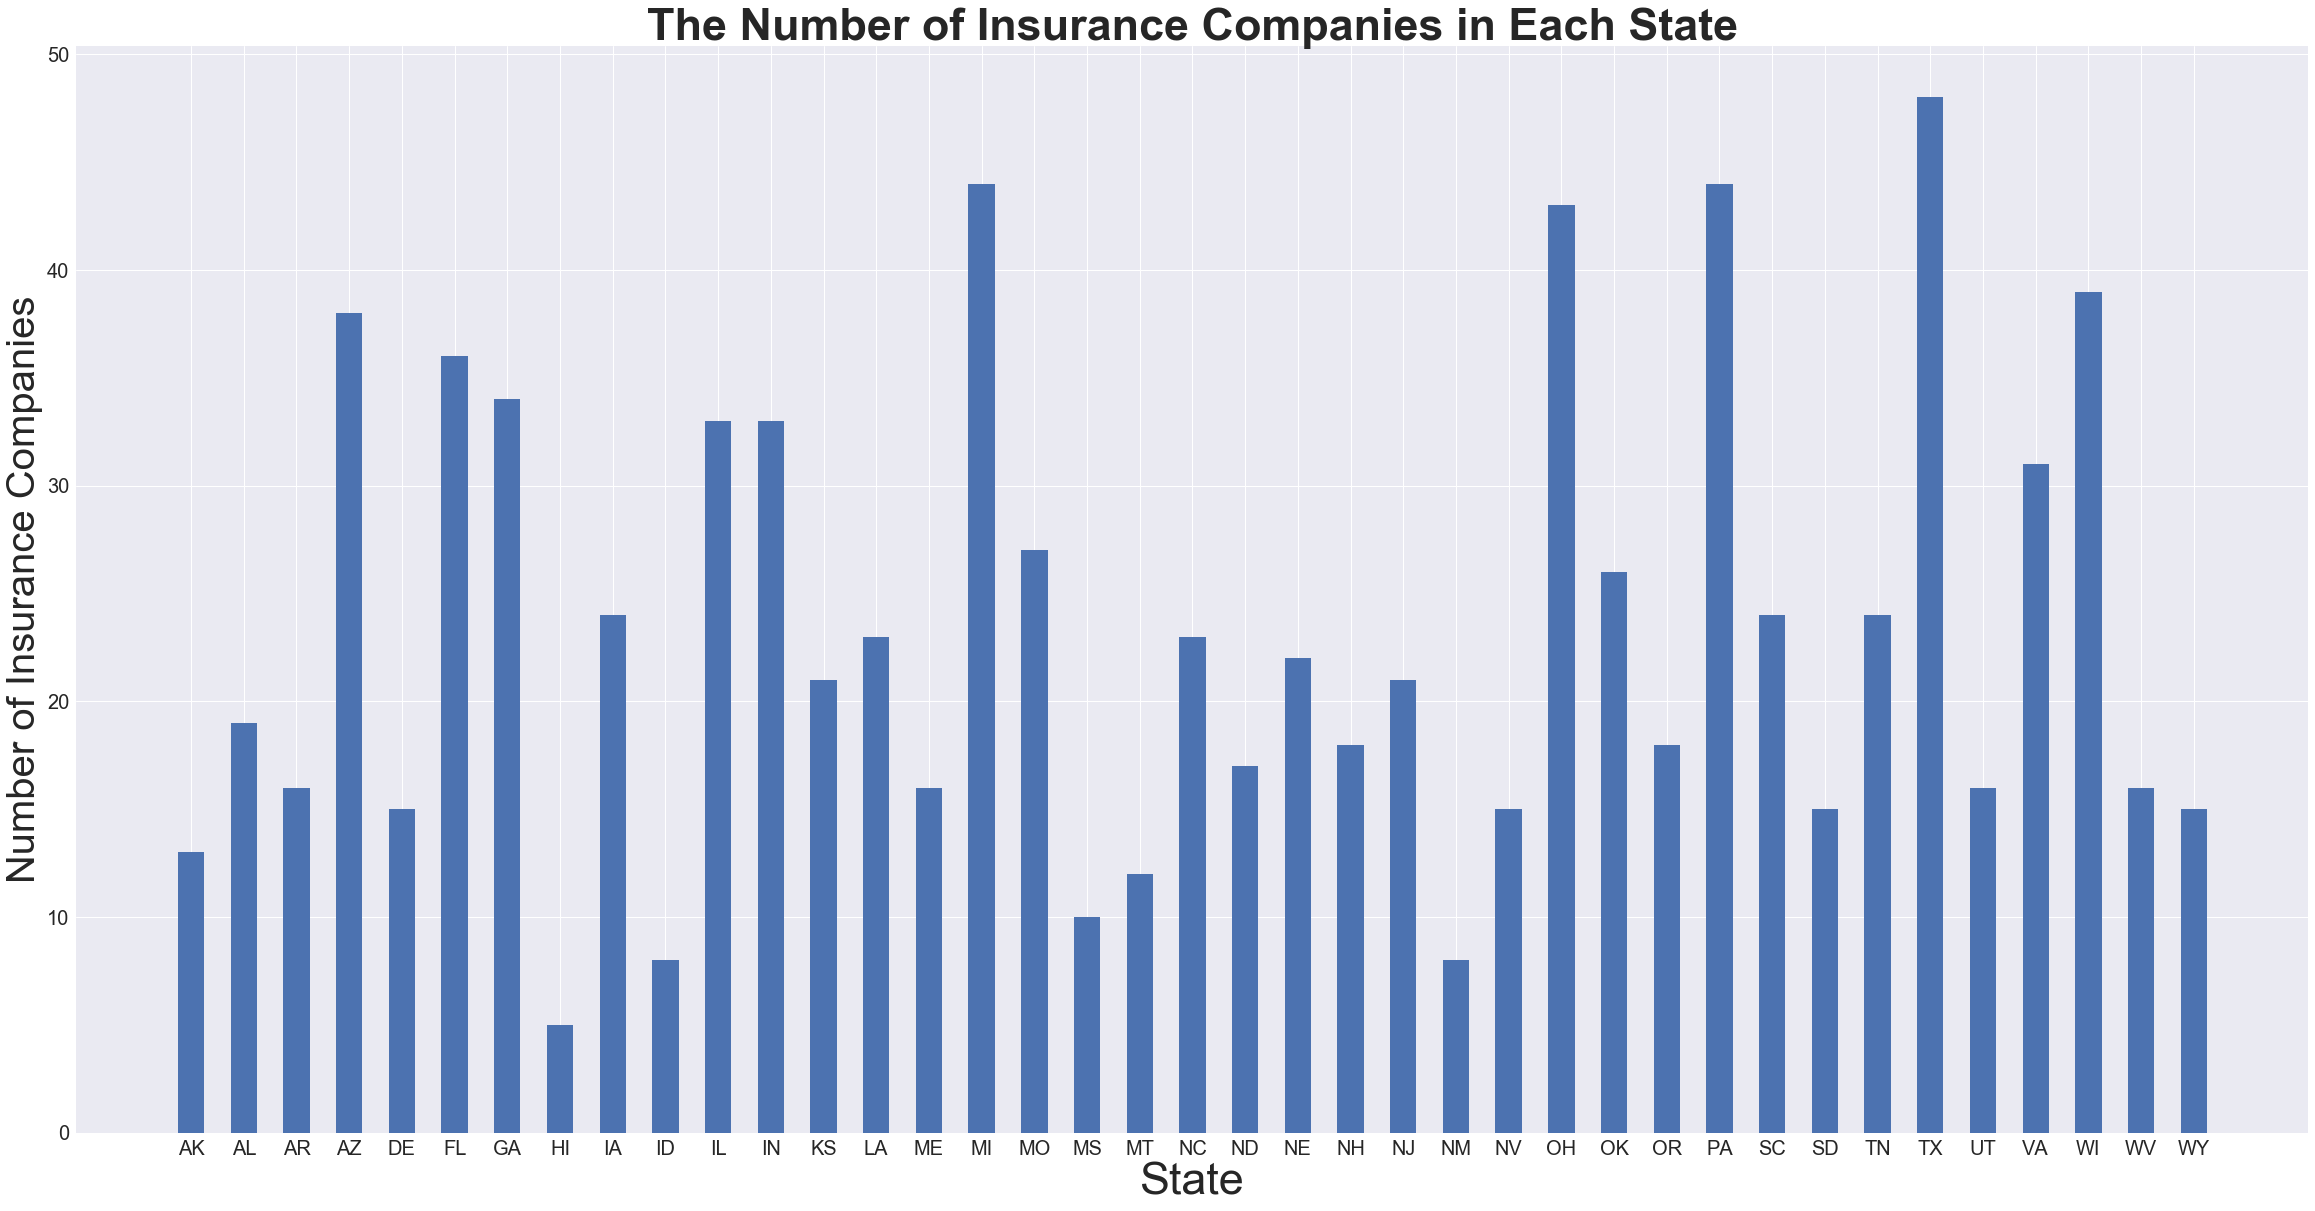

In [579]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
width = 0.5
fig, ax = plt.subplots()
rectsB4 = ax.bar(groupbyB4_2.State ,groupbyB4_2.Company, width)
plt.rcParams["figure.figsize"] = (40,20)
plt.ylabel ('Number of Insurance Companies',fontsize = 40)
plt.xlabel ('State', fontsize = 45)
plt.title('The Number of Insurance Companies in Each State',fontsize = 45, fontweight = 'bold')
plt.show()

In [580]:
## b.Which states have the lowest and highest number of insurance issuers respectively? 

#### HI has the lowest number of Issuers, while TX has the highest.

In [581]:
## B4-3 Could competition explain the difference in insurance premiums across states? 

In [582]:
## a. Use a scatterplot to plot the number of insurance issuers against the median insurance cost for each state.

In [584]:
fun_last = {'IssuerId':{'Issuer Count':'nunique'}, 'IndividualRate':{'Median' : 'median'}, 
            'IndividualTobaccoRate':{'MedianTobacco' : 'median'}}
groupby_last = ir.groupby('StateCode').agg(fun_last)
groupby_last = groupby_last.reset_index()
groupby_last.columns = groupby_last.columns.droplevel(0)
groupby_last.rename(columns = {'':'State'},inplace = True)
groupby_last.head()

,State,MedianTobacco,Issuer Count,Median
0,AK,649.000,13,577.000
1,AL,361.595,19,190.080
2,AR,426.370,16,131.340
3,AZ,395.055,38,316.980
4,DE,457.035,15,341.135


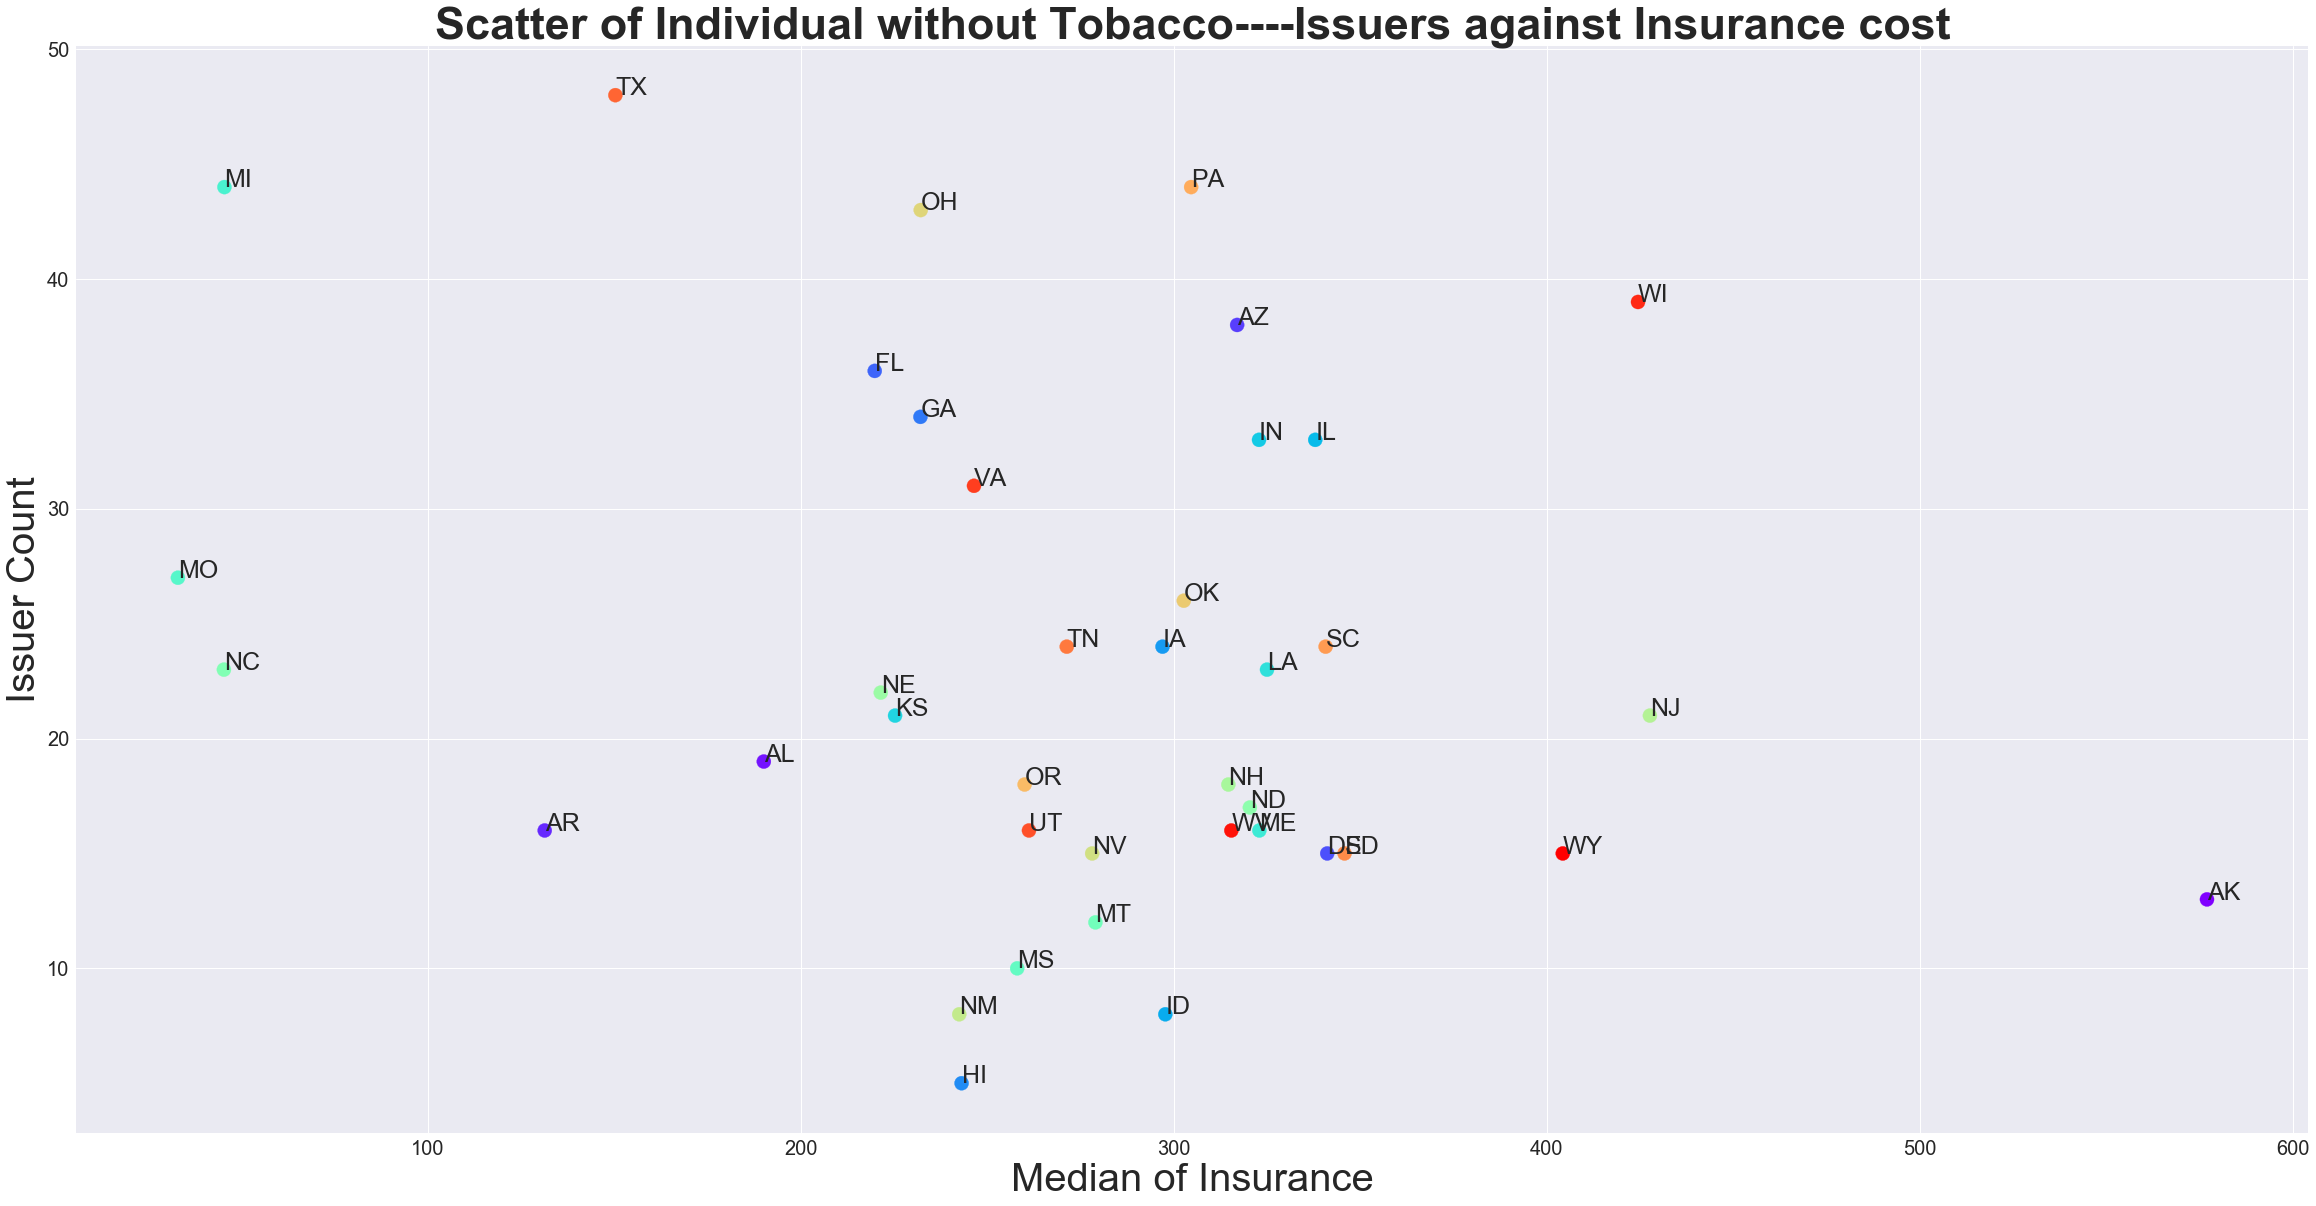

In [587]:
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(groupby_last.State)))
n = groupby_last.State
fig, ax = plt.subplots()
ax.scatter(groupby_last.Median, groupby_last['Issuer Count'], 200, colors)
for i,txt in enumerate(n):
    ax.annotate(txt,(groupby_last.Median[i],groupby_last['Issuer Count'][i]), fontsize =25)
    
plt.title ('Scatter of Individual without Tobacco----Issuers against Insurance cost',fontsize = 45, fontweight = 'bold')
plt.ylabel ('Issuer Count', fontsize = 40)   
plt.xlabel ('Median of Insurance', fontsize = 40)   
plt.show()
## Scatter of Individual without Tobacco

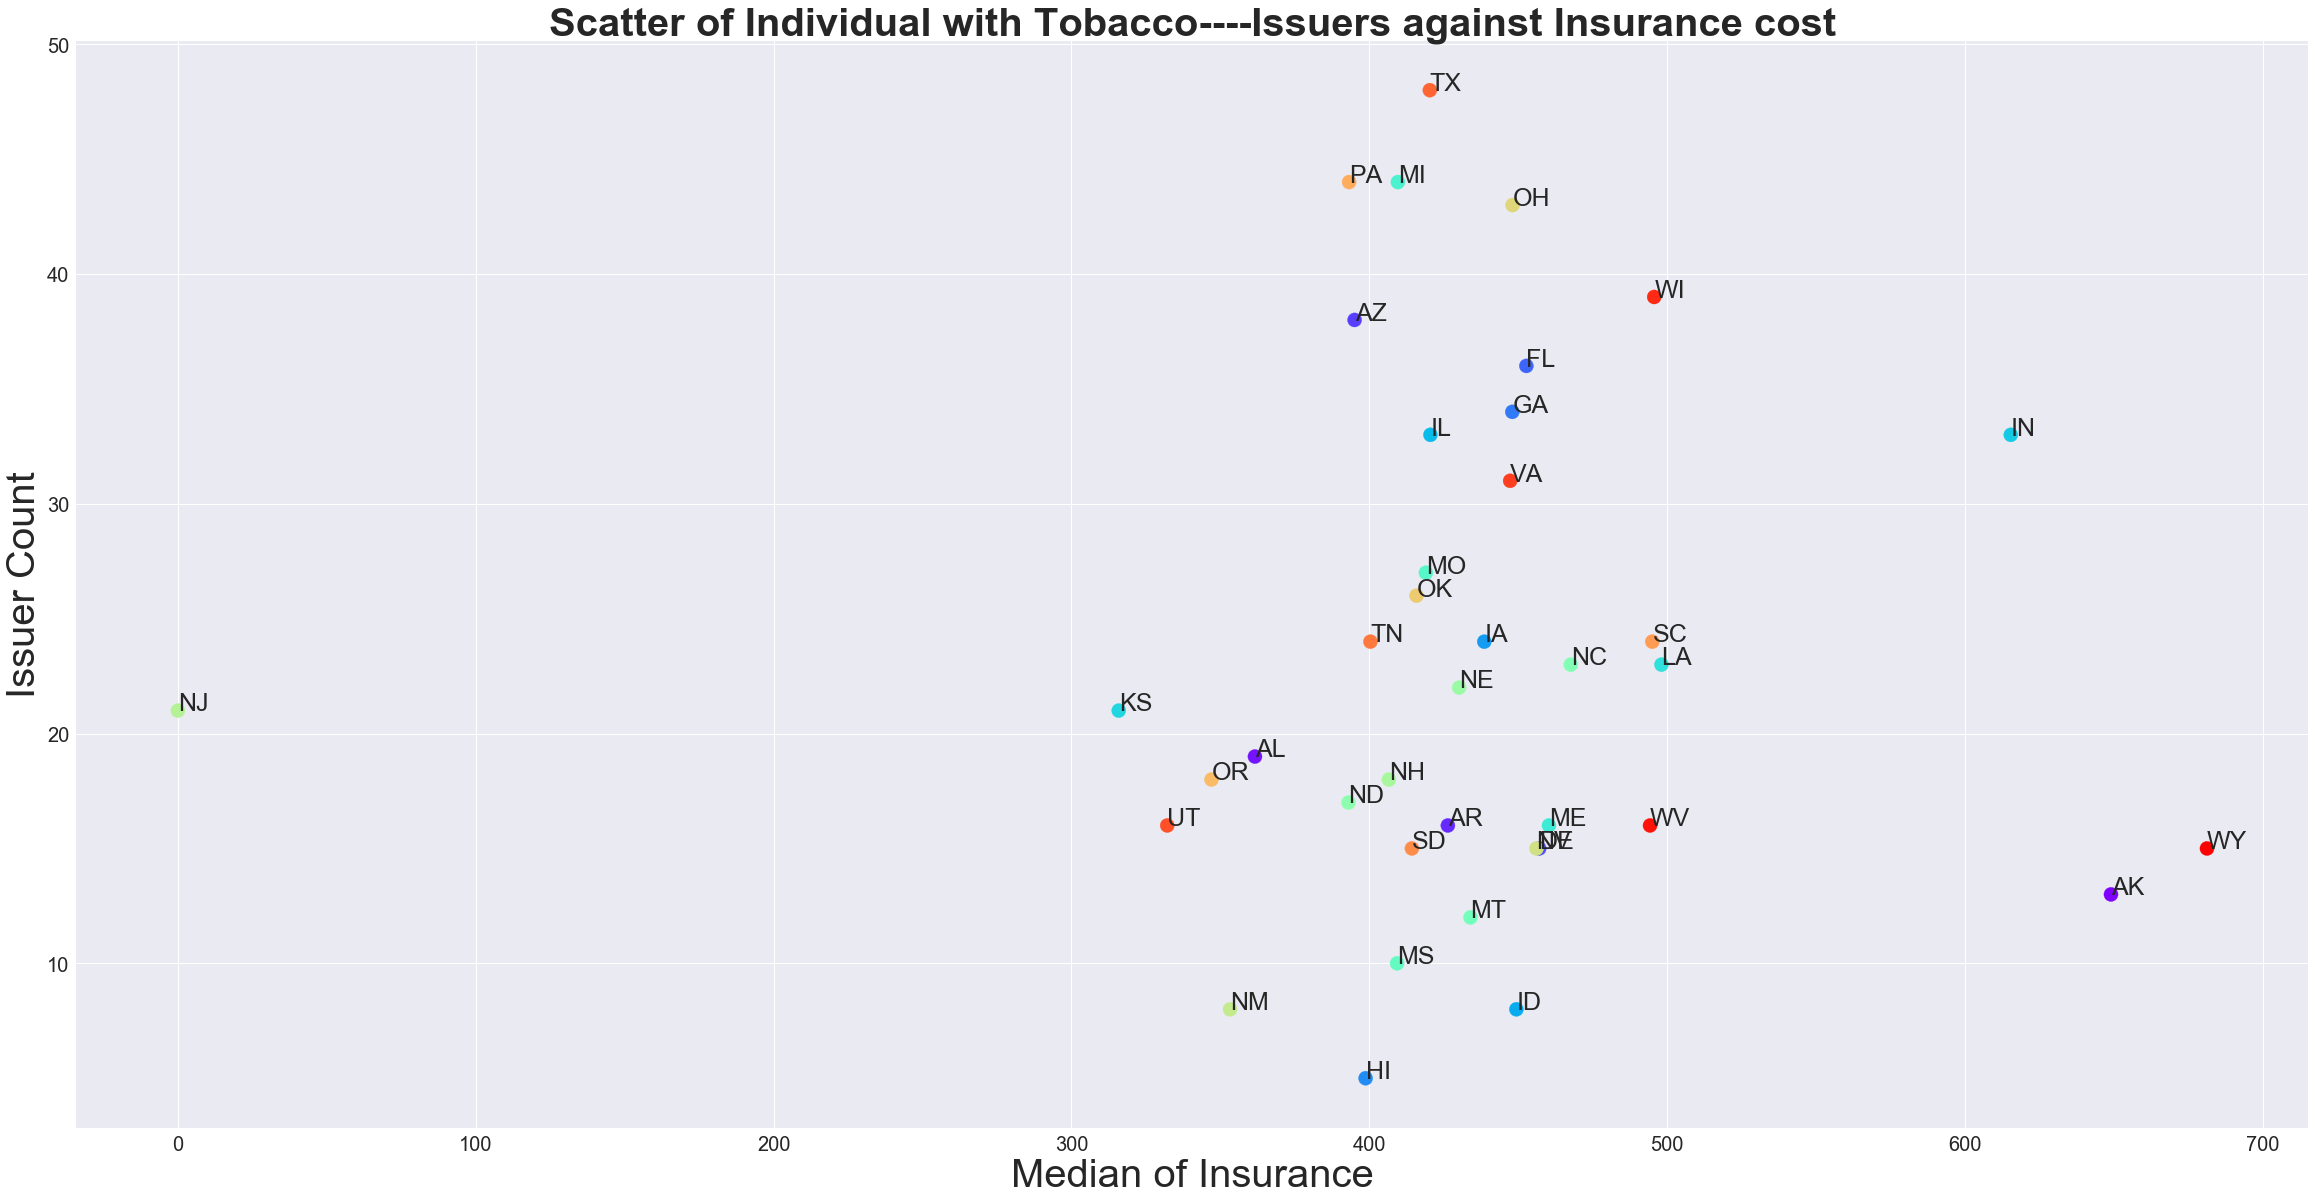

In [588]:
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(groupby_last.State)))
n = groupby_last.State
fig, ax = plt.subplots()
ax.scatter(groupby_last.MedianTobacco.fillna(0), groupby_last['Issuer Count'], 200, colors)
for i,txt in enumerate(n):
    ax.annotate(txt,(groupby_last.MedianTobacco.fillna(0)[i],groupby_last['Issuer Count'][i]), fontsize =25)
    
plt.title ('Scatter of Individual with Tobacco----Issuers against Insurance cost',fontsize = 40, fontweight = 'bold')
plt.ylabel ('Issuer Count', fontsize = 40)   
plt.xlabel ('Median of Insurance', fontsize = 40)   
plt.show() 
## Scatter of Individual with Tobacco
## NJ 's median of insurance with Tobacco has none data, so I remove the NaN.

In [589]:
## b.Do you observe a relationship? 

In gerenally:
We can observe that states with the more companies have lower median insuranse premium, and states with the small amount of companies have the highest price, which is the result of competition.

In detail:
Relationship in Tobacco data: Most data over States are placed in the center of plot, representing the average indicator of  balance between companies' count and median of Premiums for most states. States with less companies have higher premium median and vica versa.
If wee look at Non-tobacco data, the influence of the number of copanies is weaker, mosttly Insurance Premiums are between 300 and 500 no matter what is the number of insurance companies.

#### B4. Which state has the most expensive insurance issuer (in terms of median ‘IndividualRate’)? 

In [591]:
T = groupby_last.MedianTobacco.max()
NT = groupby_last.Median.max()
display('Highest Insurance Median IndividualTobacco: State: WY = {}'.format(T))
display('Highest Insurance Median Individual non Tobacco: State: AK = {}'.format(NT))

'Highest Insurance Median IndividualTobacco: State: WY = 681.23'

'Highest Insurance Median Individual non Tobacco: State: AK = 577.0'